In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
import numpy as np
import time
import missingno as msno
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
#from scipy.stats import reciprocal

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
small_org = pd.read_excel('/content/drive/MyDrive/CHURNDATA.xlsx')
small_org

CIF              CUS_DOB  AGE  CUS_Month_Income CUS_Gender  \
0     XXXXXX  Feb 13 1970 12:00AM   49           7116.64       MALE   
1     XXXXXX  Sep 20 1973 12:00AM   46        1500000.00     FEMALE   
2     XXXXXX  Jul 18 1966 12:00AM   53        5000000.00     FEMALE   
3     XXXXXX  Jan  9 2004 12:00AM   15            500.00     FEMALE   
4     XXXXXX  Mar  7 1971 12:00AM   48        9000000.00     FEMALE   
...      ...                  ...  ...               ...        ...   
1244  XXXXXX  Sep 10 1951 12:00AM   68           4500.00       MALE   
1245  XXXXXX  Mar 23 1984 12:00AM   35        3500000.00       MALE   
1246  XXXXXX  Feb  4 1985 12:00AM   34           1000.00       MALE   
1247  XXXXXX  Feb  3 1950 12:00AM   69        2000000.00       MALE   
1248  XXXXXX  Feb 23 1961 12:00AM   58        5000000.00     FEMALE   

     CUS_Marital_Status CUS_Customer_Since  YEARS_WITH_US  \
0               MARRIED         1994-06-30             25   
1                SINGLE         2005-05-19             14   
2                SINGLE         2005-05-20             14   
3                SINGLE         2005-05-20             14   
4                SINGLE         2014-06-30              5   
...                 ...                ...            ...   
1244             SINGLE         2005-07-25             14   
1245             SINGLE         2005-07-27             14   
1246             SINGLE         2005-07-25             14   
1247             SINGLE         2005-07-26             14   
1248             SINGLE         2005-07-26             14   

      # total debit transactions for S1  # total debit transactions for S2  \
0                                   277                                265   
1                                    37                                 15   
2                                    31                                 14   
3                                     0                                  1   
4                                    15                                 33   
...                                 ...                                ...   
1244                                 13                                 12   
1245                                 55                                 35   
1246                                415                                368   
1247                                147                                202   
1248                                 76                                 88   

      ...  total credit amount for S2  total credit amount for S3  \
0     ...                  1764079.61                  2378592.62   
1     ...                    19500.00                    57500.00   
2     ...                   240311.84                    70946.86   
3     ...                    28089.99                    18753.92   
4     ...                   176000.00                    70500.00   
...   ...                         ...                         ...   
1244  ...                        0.00                        0.00   
1245  ...                   119137.62                   440891.65   
1246  ...                   733658.65                   971555.27   
1247  ...                   532708.75                   400814.60   
1248  ...                   422000.00                   214350.00   

      total debit amount  total debit transactions  total credit amount  \
0             4758311.63                       887           5659653.33   
1              139363.22                        97             87000.00   
2               37375.46                        53           1020883.70   
3                4000.00                         1             76946.96   
4              338470.29                        60            442100.00   
...                  ...                       ...                  ...   
1244             5645.60                        26                 0.00   
1245           385735.90                       127       

In [ ]:
small_org.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CIF                                 1249 non-null   object        
 1   CUS_DOB                             1249 non-null   object        
 2   AGE                                 1249 non-null   int64         
 3   CUS_Month_Income                    1238 non-null   float64       
 4   CUS_Gender                          1247 non-null   object        
 5   CUS_Marital_Status                  1249 non-null   object        
 6   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 7   YEARS_WITH_US                       1249 non-null   int64         
 8   # total debit transactions for S1   1249 non-null   int64         
 9   # total debit transactions for S2   1249 non-null   int64         
 10  # total debit transactio

In [ ]:
#check for null values
missing_vals = small_org.isnull().sum()
missing_vals

CIF                                    0
CUS_DOB                                0
AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
CUS_Customer_Since                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactio

In [ ]:
#check for percentage of null values per column
missing_vals_percent = small_org.isnull().mean()*100
missing_vals_percent

CIF                                   0.000000
CUS_DOB                               0.000000
AGE                                   0.000000
CUS_Month_Income                      0.880705
CUS_Gender                            0.160128
CUS_Marital_Status                    0.000000
CUS_Customer_Since                    0.000000
YEARS_WITH_US                         0.000000
# total debit transactions for S1     0.000000
# total debit transactions for S2     0.000000
# total debit transactions for S3     0.000000
total debit amount for S1             0.000000
total debit amount for S2             0.000000
total debit amount for S3             0.000000
# total credit transactions for S1    0.000000
# total credit transactions for S2    0.000000
# total credit transactions for S3    0.000000
total credit amount for S1            0.000000
total credit amount for S2            0.000000
total credit amount for S3            0.000000
total debit amount                    0.000000
total debit t

<Figure size 1000x600 with 0 Axes>

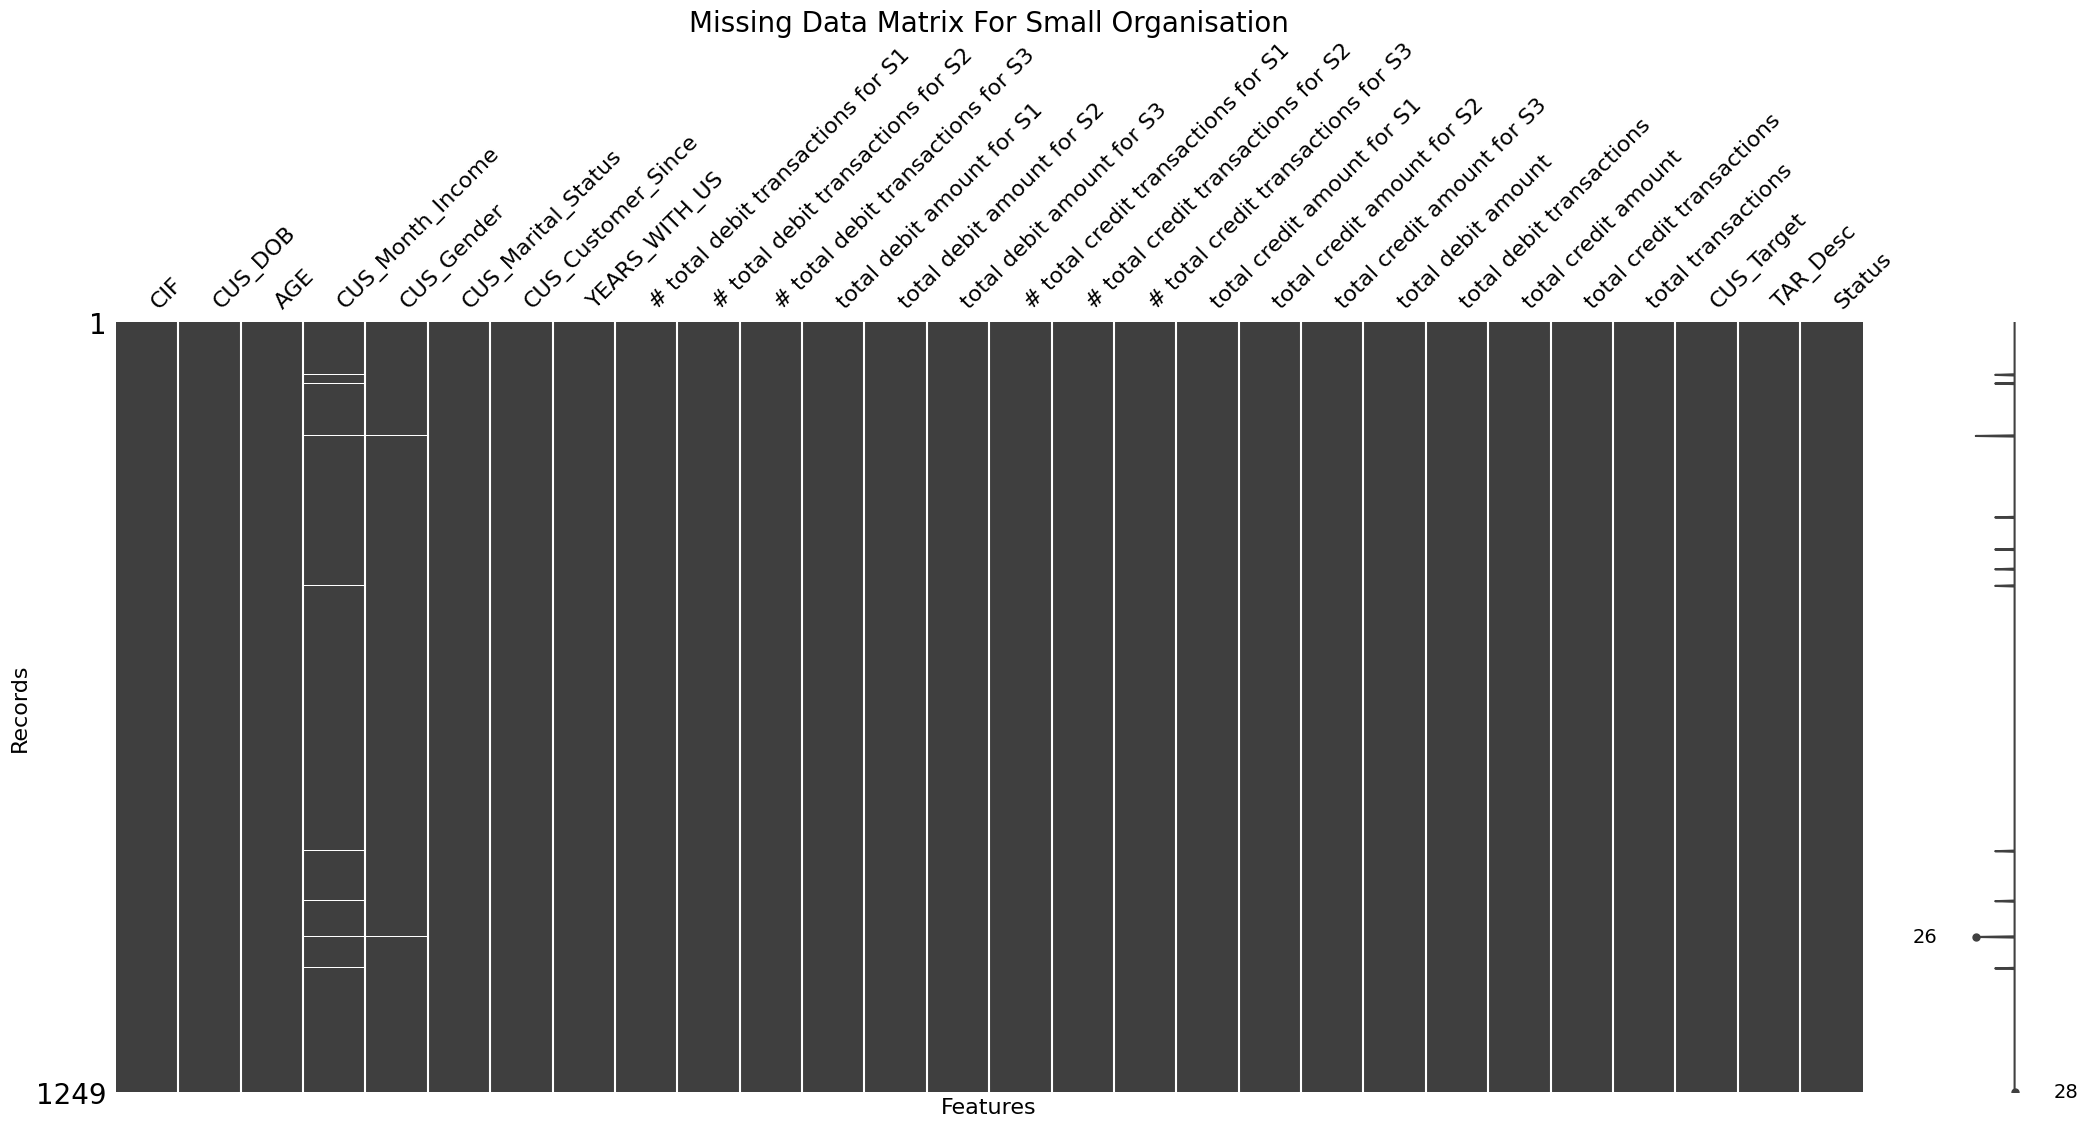

In [ ]:
# Visualize missing data in the dataset using msno.matrix
plt.figure(figsize=(10, 6))
msno.matrix(small_org)
plt.title('Missing Data Matrix For Small Organisation', fontsize=20)  # Add a title to the plot
plt.xlabel('Features', fontsize=16)  # Label for the x-axis
plt.ylabel('Records', fontsize=16)  # Label for the y-axis
plt.show()

In [ ]:
#create a copy of the of the data for manipulation
small_org_clean = small_org.copy()
small_org_clean

CIF              CUS_DOB  AGE  CUS_Month_Income CUS_Gender  \
0     XXXXXX  Feb 13 1970 12:00AM   49           7116.64       MALE   
1     XXXXXX  Sep 20 1973 12:00AM   46        1500000.00     FEMALE   
2     XXXXXX  Jul 18 1966 12:00AM   53        5000000.00     FEMALE   
3     XXXXXX  Jan  9 2004 12:00AM   15            500.00     FEMALE   
4     XXXXXX  Mar  7 1971 12:00AM   48        9000000.00     FEMALE   
...      ...                  ...  ...               ...        ...   
1244  XXXXXX  Sep 10 1951 12:00AM   68           4500.00       MALE   
1245  XXXXXX  Mar 23 1984 12:00AM   35        3500000.00       MALE   
1246  XXXXXX  Feb  4 1985 12:00AM   34           1000.00       MALE   
1247  XXXXXX  Feb  3 1950 12:00AM   69        2000000.00       MALE   
1248  XXXXXX  Feb 23 1961 12:00AM   58        5000000.00     FEMALE   

     CUS_Marital_Status CUS_Customer_Since  YEARS_WITH_US  \
0               MARRIED         1994-06-30             25   
1                SINGLE         2005-05-19             14   
2                SINGLE         2005-05-20             14   
3                SINGLE         2005-05-20             14   
4                SINGLE         2014-06-30              5   
...                 ...                ...            ...   
1244             SINGLE         2005-07-25             14   
1245             SINGLE         2005-07-27             14   
1246             SINGLE         2005-07-25             14   
1247             SINGLE         2005-07-26             14   
1248             SINGLE         2005-07-26             14   

      # total debit transactions for S1  # total debit transactions for S2  \
0                                   277                                265   
1                                    37                                 15   
2                                    31                                 14   
3                                     0                                  1   
4                                    15                                 33   
...                                 ...                                ...   
1244                                 13                                 12   
1245                                 55                                 35   
1246                                415                                368   
1247                                147                                202   
1248                                 76                                 88   

      ...  total credit amount for S2  total credit amount for S3  \
0     ...                  1764079.61                  2378592.62   
1     ...                    19500.00                    57500.00   
2     ...                   240311.84                    70946.86   
3     ...                    28089.99                    18753.92   
4     ...                   176000.00                    70500.00   
...   ...                         ...                         ...   
1244  ...                        0.00                        0.00   
1245  ...                   119137.62                   440891.65   
1246  ...                   733658.65                   971555.27   
1247  ...                   532708.75                   400814.60   
1248  ...                   422000.00                   214350.00   

      total debit amount  total debit transactions  total credit amount  \
0             4758311.63                       887           5659653.33   
1              139363.22                        97             87000.00   
2               37375.46                        53           1020883.70   
3                4000.00                         1             76946.96   
4              338470.29                        60            442100.00   
...                  ...                       ...                  ...   
1244             5645.60                        26                 0.00   
1245           385735.90                       127       

In [ ]:
# Filter rows where 'CUS_Month_Income' or 'CUS_Gender' is missing (null)
#small_org_clean.loc[(small_org ['CUS_Month_Income'].isnull() == True) | (small_org ['CUS_Gender'].isnull() == True)]

In [ ]:
small_org_clean = small_org_clean.dropna(axis=0)
small_org_clean

CIF              CUS_DOB  AGE  CUS_Month_Income CUS_Gender  \
0     XXXXXX  Feb 13 1970 12:00AM   49           7116.64       MALE   
1     XXXXXX  Sep 20 1973 12:00AM   46        1500000.00     FEMALE   
2     XXXXXX  Jul 18 1966 12:00AM   53        5000000.00     FEMALE   
3     XXXXXX  Jan  9 2004 12:00AM   15            500.00     FEMALE   
4     XXXXXX  Mar  7 1971 12:00AM   48        9000000.00     FEMALE   
...      ...                  ...  ...               ...        ...   
1244  XXXXXX  Sep 10 1951 12:00AM   68           4500.00       MALE   
1245  XXXXXX  Mar 23 1984 12:00AM   35        3500000.00       MALE   
1246  XXXXXX  Feb  4 1985 12:00AM   34           1000.00       MALE   
1247  XXXXXX  Feb  3 1950 12:00AM   69        2000000.00       MALE   
1248  XXXXXX  Feb 23 1961 12:00AM   58        5000000.00     FEMALE   

     CUS_Marital_Status CUS_Customer_Since  YEARS_WITH_US  \
0               MARRIED         1994-06-30             25   
1                SINGLE         2005-05-19             14   
2                SINGLE         2005-05-20             14   
3                SINGLE         2005-05-20             14   
4                SINGLE         2014-06-30              5   
...                 ...                ...            ...   
1244             SINGLE         2005-07-25             14   
1245             SINGLE         2005-07-27             14   
1246             SINGLE         2005-07-25             14   
1247             SINGLE         2005-07-26             14   
1248             SINGLE         2005-07-26             14   

      # total debit transactions for S1  # total debit transactions for S2  \
0                                   277                                265   
1                                    37                                 15   
2                                    31                                 14   
3                                     0                                  1   
4                                    15                                 33   
...                                 ...                                ...   
1244                                 13                                 12   
1245                                 55                                 35   
1246                                415                                368   
1247                                147                                202   
1248                                 76                                 88   

      ...  total credit amount for S2  total credit amount for S3  \
0     ...                  1764079.61                  2378592.62   
1     ...                    19500.00                    57500.00   
2     ...                   240311.84                    70946.86   
3     ...                    28089.99                    18753.92   
4     ...                   176000.00                    70500.00   
...   ...                         ...                         ...   
1244  ...                        0.00                        0.00   
1245  ...                   119137.62                   440891.65   
1246  ...                   733658.65                   971555.27   
1247  ...                   532708.75                   400814.60   
1248  ...                   422000.00                   214350.00   

      total debit amount  total debit transactions  total credit amount  \
0             4758311.63                       887           5659653.33   
1              139363.22                        97             87000.00   
2               37375.46                        53           1020883.70   
3                4000.00                         1             76946.96   
4              338470.29                        60            442100.00   
...                  ...                       ...                  ...   
1244             5645.60                        26                 0.00   
1245           385735.90                       127       

In [ ]:
small_org_clean.describe()

AGE  CUS_Month_Income  YEARS_WITH_US  \
count  1238.000000      1.238000e+03    1238.000000   
mean     46.565428      2.764869e+06      14.054927   
std      11.967559      5.406761e+06       2.162042   
min      14.000000      0.000000e+00       0.000000   
25%      39.000000      7.568750e+03      14.000000   
50%      46.000000      1.500000e+06      14.000000   
75%      55.000000      3.000000e+06      14.000000   
max      89.000000      8.000000e+07      28.000000   

       # total debit transactions for S1  # total debit transactions for S2  \
count                        1238.000000                        1238.000000   
mean                           54.609047                          55.995153   
std                            80.999300                          81.285956   
min                             0.000000                           0.000000   
25%                             7.250000                           6.000000   
50%                            22.000000                          24.000000   
75%                            65.000000                          65.750000   
max                           715.000000                         547.000000   

       # total debit transactions for S3  total debit amount for S1  \
count                        1238.000000               1.238000e+03   
mean                           57.378837               3.171229e+05   
std                            84.900938               1.519922e+06   
min                             0.000000               0.000000e+00   
25%                             6.000000               1.195674e+04   
50%                            25.000000               5.434135e+04   
75%                            68.750000               1.906623e+05   
max                           757.000000               3.573349e+07   

       total debit amount for S2  total debit amount for S3  \
count               1.238000e+03               1.238000e+03   
mean                3.114345e+05               3.087207e+05   
std                 1.299411e+06               9.423388e+05   
min                 0.000000e+00               0.000000e+00   
25%                 1.123637e+04               7.608700e+03   
50%                 6.355581e+04               6.045000e+04   
75%                 2.132888e+05               2.272960e+05   
max                 3.723382e+07               1.866511e+07   

       # total credit transactions for S1  ...  \
count                         1238.000000  ...   
mean                             7.663974  ...   
std                             13.590328  ...   
min                              0.000000  ...   
25%                              0.000000  ...   
50%                              6.000000  ...   
75%                              8.000000  ...   
max                            189.000000  ...   

       # total credit transactions for S3  total credit amount for S1  \
count                         1238.000000                1.238000e+03   
mean                             8.732633                3.115560e+05   
std                             14.128996                1.638419e+06   
min                              0.000000                0.000000e+00   
25%                              0.000000                0.000000e+00   
50%                              6.000000                4.563965e+04   
75%                             10.000000                1.754260e+05   
max                            169.000000                4.920688e+07   

       total credit amount for S2  total credit amount for S3  \
count                1.238000e+03                1.238000e+03   
mean                 3.199811e+05                3.044822e+05   
std                  1.052724e+06                1.279049e+06   
min                  0.000000e+00                0.000000e+00   
25%                  0.000000e+00                0.000000e+00   
50%                  4.734396e+04                5.028523e+04   
75%                  1.911164e+05  

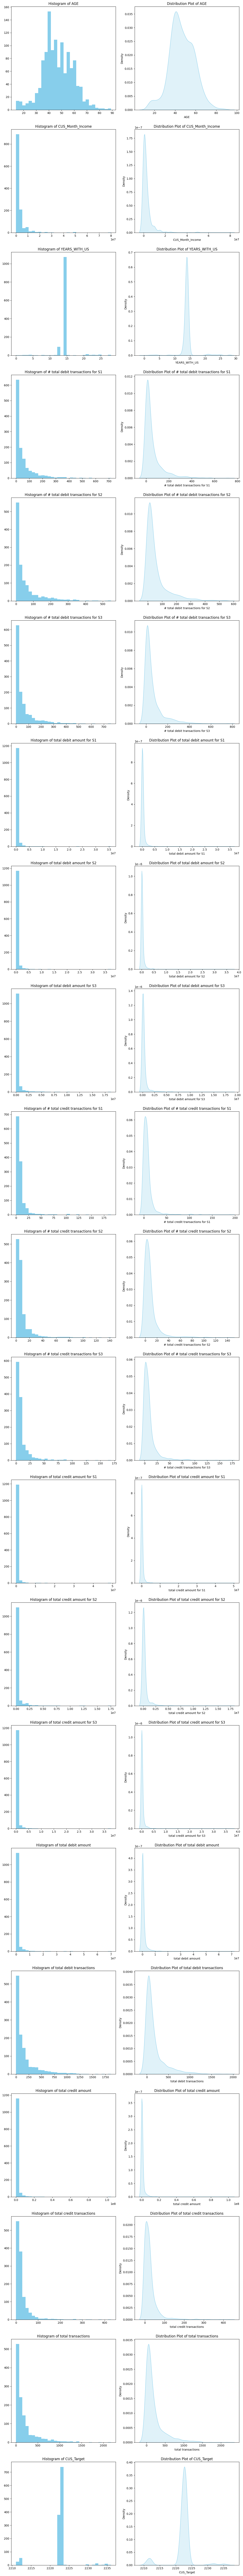

In [ ]:
# Select numerical columns
num_cols = small_org_clean.select_dtypes(include=['float', 'int']).columns

# Create subplots with specified number of rows and columns
fig, axs = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(12, len(num_cols) * 6))

# Loop through each numerical column and create histogram and distribution plots
for i, col in enumerate(num_cols):
    # Histogram plot
    axs[i, 0].hist(small_org_clean[col], bins=30, color='skyblue')
    axs[i, 0].set_title(f'Histogram of {col}')

    # Distribution plot (kde)
    sns.kdeplot(small_org_clean[col], ax=axs[i, 1], fill=True, color='skyblue')
    axs[i, 1].set_title(f'Distribution Plot of {col}')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
small_org_interim = small_org_clean.copy()
small_org_interim

CIF              CUS_DOB  AGE  CUS_Month_Income CUS_Gender  \
0     XXXXXX  Feb 13 1970 12:00AM   49           7116.64       MALE   
1     XXXXXX  Sep 20 1973 12:00AM   46        1500000.00     FEMALE   
2     XXXXXX  Jul 18 1966 12:00AM   53        5000000.00     FEMALE   
3     XXXXXX  Jan  9 2004 12:00AM   15            500.00     FEMALE   
4     XXXXXX  Mar  7 1971 12:00AM   48        9000000.00     FEMALE   
...      ...                  ...  ...               ...        ...   
1244  XXXXXX  Sep 10 1951 12:00AM   68           4500.00       MALE   
1245  XXXXXX  Mar 23 1984 12:00AM   35        3500000.00       MALE   
1246  XXXXXX  Feb  4 1985 12:00AM   34           1000.00       MALE   
1247  XXXXXX  Feb  3 1950 12:00AM   69        2000000.00       MALE   
1248  XXXXXX  Feb 23 1961 12:00AM   58        5000000.00     FEMALE   

     CUS_Marital_Status CUS_Customer_Since  YEARS_WITH_US  \
0               MARRIED         1994-06-30             25   
1                SINGLE         2005-05-19             14   
2                SINGLE         2005-05-20             14   
3                SINGLE         2005-05-20             14   
4                SINGLE         2014-06-30              5   
...                 ...                ...            ...   
1244             SINGLE         2005-07-25             14   
1245             SINGLE         2005-07-27             14   
1246             SINGLE         2005-07-25             14   
1247             SINGLE         2005-07-26             14   
1248             SINGLE         2005-07-26             14   

      # total debit transactions for S1  # total debit transactions for S2  \
0                                   277                                265   
1                                    37                                 15   
2                                    31                                 14   
3                                     0                                  1   
4                                    15                                 33   
...                                 ...                                ...   
1244                                 13                                 12   
1245                                 55                                 35   
1246                                415                                368   
1247                                147                                202   
1248                                 76                                 88   

      ...  total credit amount for S2  total credit amount for S3  \
0     ...                  1764079.61                  2378592.62   
1     ...                    19500.00                    57500.00   
2     ...                   240311.84                    70946.86   
3     ...                    28089.99                    18753.92   
4     ...                   176000.00                    70500.00   
...   ...                         ...                         ...   
1244  ...                        0.00                        0.00   
1245  ...                   119137.62                   440891.65   
1246  ...                   733658.65                   971555.27   
1247  ...                   532708.75                   400814.60   
1248  ...                   422000.00                   214350.00   

      total debit amount  total debit transactions  total credit amount  \
0             4758311.63                       887           5659653.33   
1              139363.22                        97             87000.00   
2               37375.46                        53           1020883.70   
3                4000.00                         1             76946.96   
4              338470.29                        60            442100.00   
...                  ...                       ...                  ...   
1244             5645.60                        26                 0.00   
1245           385735.90                       127       

In [ ]:
#small_org_interim['YEARS_WITH_US'].max()

12 - 14    1168
21 - 23      21
24 - 26      11
3 - 5         9
9 - 11        6
0 - 2         5
6 - 8         5
27 - 29       5
15 - 17       4
18 - 20       4
30 - 32       0
Name: Tenure(years), dtype: int64


In [ ]:
# Calculate the 25th and 75th percentiles of the 'CUS_Month_Income' column
percentile25 = small_org_interim['CUS_Month_Income'].quantile(0.25)
percentile75 = small_org_interim['CUS_Month_Income'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outlier detection
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Replace outliers in 'CUS_Month_Income' with the upper or lower limit
small_org_interim['Monthly Income'] = np.where(small_org_interim['CUS_Month_Income'] > upper_limit, upper_limit,
                                              np.where(small_org_interim['CUS_Month_Income'] < lower_limit, lower_limit,
                                                       small_org_interim['CUS_Month_Income']))


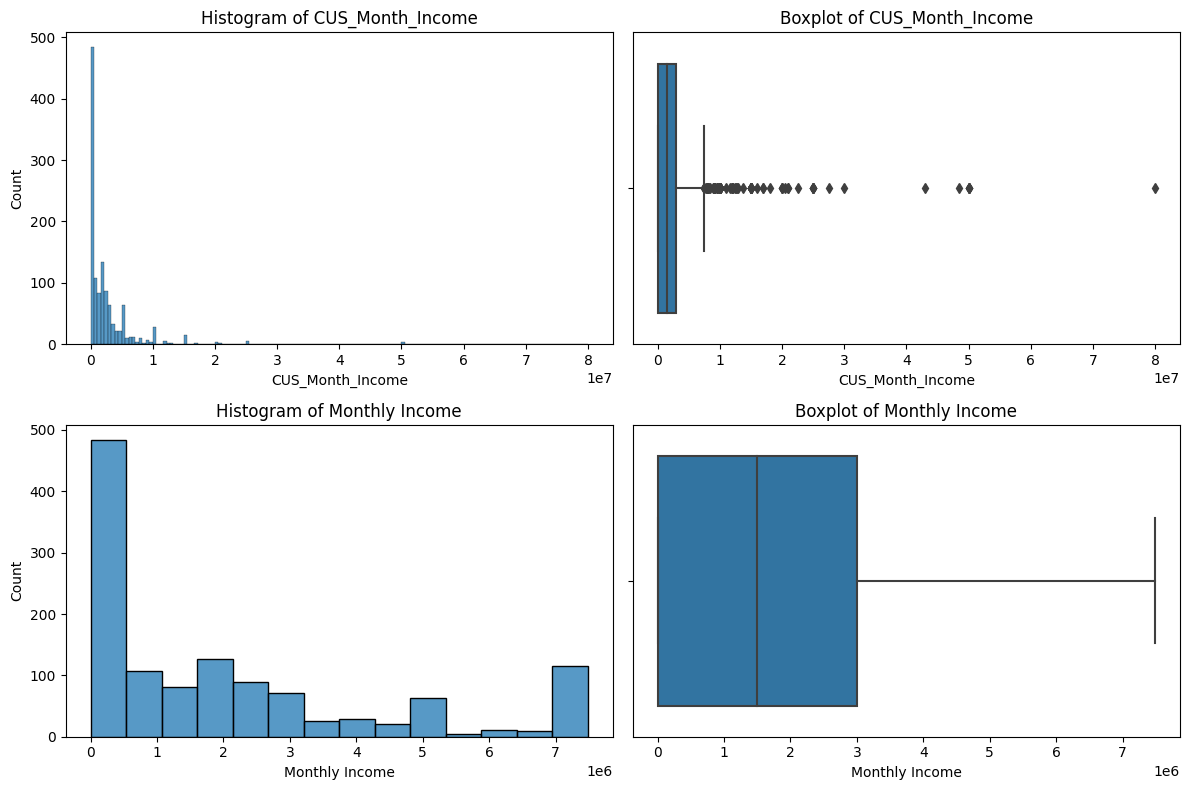

In [ ]:
# Create a figure with a 2x2 grid
plt.figure(figsize=(12, 8))

# Plot histogram of 'CUS_Month_Income' in the first subplot
plt.subplot(2, 2, 1)
sns.histplot(x=small_org_interim['CUS_Month_Income'])
plt.title('Histogram of CUS_Month_Income')

# Plot boxplot of 'CUS_Month_Income' in the second subplot
plt.subplot(2, 2, 2)
sns.boxplot(x=small_org_interim['CUS_Month_Income'])
plt.title('Boxplot of CUS_Month_Income')

# Plot histogram of 'Monthly Income' in the third subplot
plt.subplot(2, 2, 3)
sns.histplot(x=small_org_interim['Monthly Income'])
plt.title('Histogram of Monthly Income')

# Plot boxplot of 'Monthly Income' in the fourth subplot
plt.subplot(2, 2, 4)
sns.boxplot(x=small_org_interim['Monthly Income'])
plt.title('Boxplot of Monthly Income')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
# Calculate the 25th and 75th percentiles of the 'total debit amount' column
percentile25 = small_org_interim['total debit amount'].quantile(0.25)
percentile75 = small_org_interim['total debit amount'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outlier detection
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Replace outliers in 'CUS_Month_Income' with the upper or lower limit
small_org_interim['Total Debit Amount'] = np.where(small_org_interim['total debit amount'] > upper_limit, upper_limit,
                                          np.where(small_org_interim['total debit amount'] < lower_limit, lower_limit,
                                                   small_org_interim['total debit amount']))

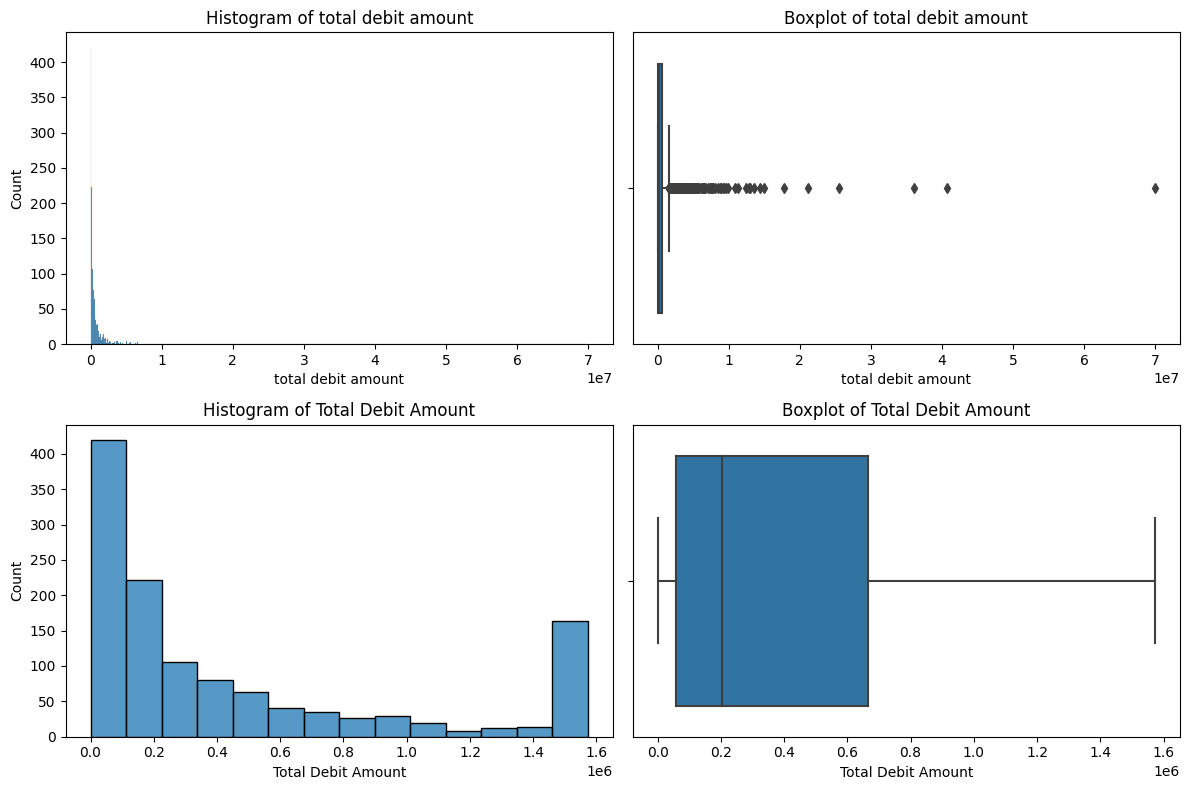

In [ ]:
# Create a new figure with a size of 16x8 inches
plt.figure(figsize=(12, 8))

# Plot histogram of 'total debit amount' in the first subplot
plt.subplot(2, 2, 1)
sns.histplot(x=small_org_interim['total debit amount'])
plt.title('Histogram of total debit amount')

# Plot boxplot of 'total debit amount' in the second subplot
plt.subplot(2, 2, 2)
sns.boxplot(x=small_org_interim['total debit amount'])
plt.title('Boxplot of total debit amount')

# Plot histogram of 'Total Debit Amount' in the third subplot
plt.subplot(2, 2, 3)
sns.histplot(x=small_org_interim['Total Debit Amount'])
plt.title('Histogram of Total Debit Amount')

# Plot boxplot for 'Total Debit Amount' in the fourth subplot
plt.subplot(2, 2, 4)
sns.boxplot(x=small_org_interim['Total Debit Amount'])
plt.title('Boxplot of Total Debit Amount')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Calculate the 25th and 75th percentiles of the 'total debit transactions' column
percentile25 = small_org_interim['total debit transactions'].quantile(0.25)
percentile75 = small_org_interim['total debit transactions'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outlier detection
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Replace outliers in 'CUS_Month_Income' with the upper or lower limit
small_org_interim['Total Debit Transactions'] = np.where(small_org_interim['total debit transactions'] > upper_limit, upper_limit,
                                          np.where(small_org_interim['total debit transactions'] < lower_limit, lower_limit,
                                                   small_org_interim['total debit transactions']))

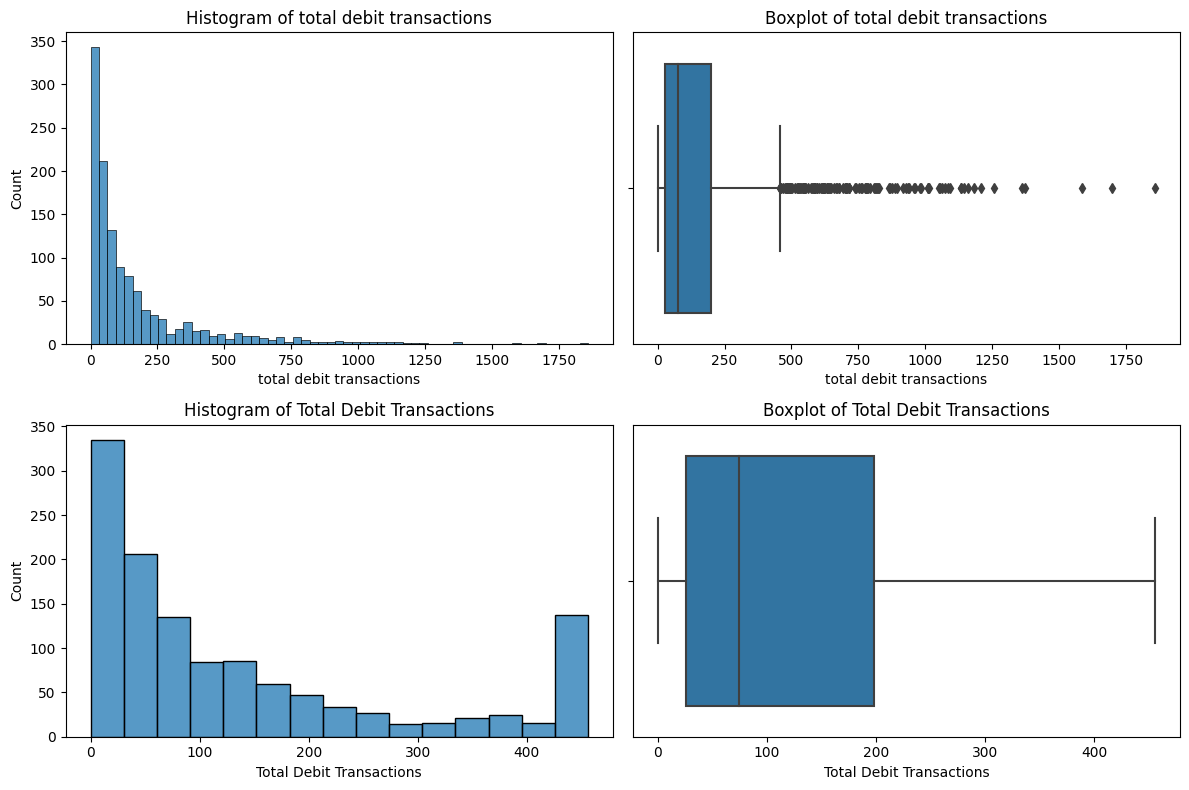

In [ ]:
# Create a new figure with a size of 16x8 inches
plt.figure(figsize=(12, 8))

# Subplot 1: Histogram for 'total debit transactions'
plt.subplot(2, 2, 1)
sns.histplot(x=small_org_interim['total debit transactions'])
plt.title('Histogram of total debit transactions')

# Subplot 2: Boxplot for 'total debit transactions'
plt.subplot(2, 2, 2)
sns.boxplot(x=small_org_interim['total debit transactions'])
plt.title('Boxplot of total debit transactions')

# Subplot 3: Histogram for 'Total Debit Transactions'
plt.subplot(2, 2, 3)
sns.histplot(x=small_org_interim['Total Debit Transactions'])
plt.title('Histogram of Total Debit Transactions')

# Subplot 4: Boxplot for 'Total Debit Transactions'
plt.subplot(2, 2, 4)
sns.boxplot(x=small_org_interim['Total Debit Transactions'])
plt.title('Boxplot of Total Debit Transactions')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Calculate the 25th and 75th percentiles of the 'total credit amount' column
percentile25 = small_org_interim['total credit amount'].quantile(0.25)
percentile75 = small_org_interim['total credit amount'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outlier detection
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Replace outliers in 'total credit amount' with the upper or lower limit
small_org_interim['Total Credit Amount'] = np.where(small_org_interim['total credit amount'] > upper_limit, upper_limit,
                                                   np.where(small_org_interim['total credit amount'] < lower_limit, lower_limit,
                                                            small_org_interim['total credit amount']))


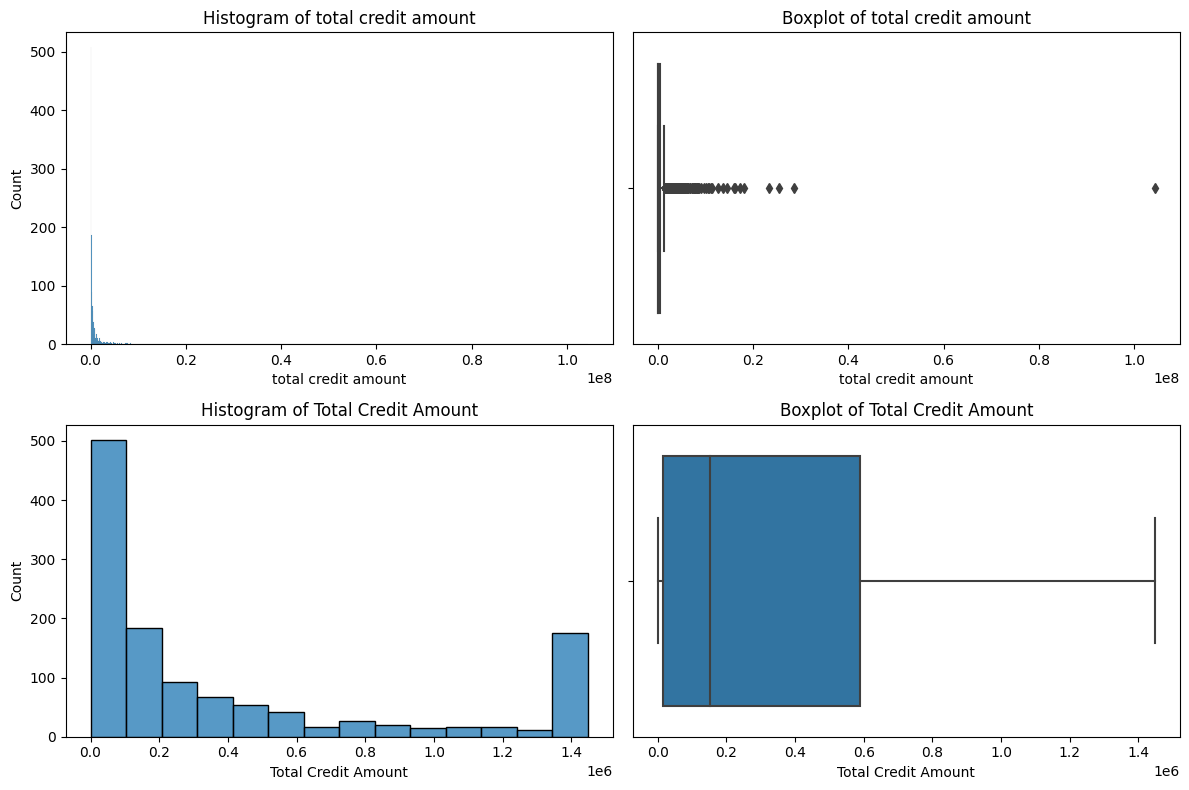

In [ ]:
# Create a figure with a 2x2 grid
plt.figure(figsize=(12, 8))

# Plot histogram of 'total credit amount' in the first subplot
plt.subplot(2, 2, 1)
sns.histplot(x=small_org_interim['total credit amount'])
plt.title('Histogram of total credit amount')

# Plot boxplot of 'total credit amount' in the second subplot
plt.subplot(2, 2, 2)
sns.boxplot(x=small_org_interim['total credit amount'])
plt.title('Boxplot of total credit amount')

# Plot histogram of 'Total Credit Amount' in the third subplot
plt.subplot(2, 2, 3)
sns.histplot(x=small_org_interim['Total Credit Amount'])
plt.title('Histogram of Total Credit Amount')

# Plot boxplot of 'Total Credit Amount' in the fourth subplot
plt.subplot(2, 2, 4)
sns.boxplot(x=small_org_interim['Total Credit Amount'])
plt.title('Boxplot of Total Credit Amount')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
# Calculate the 25th and 75th percentiles of the 'total credit transactions' column
percentile25 = small_org_interim['total credit transactions'].quantile(0.25)
percentile75 = small_org_interim['total credit transactions'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outlier detection
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Replace outliers in 'total credit transactions' with the upper or lower limit
small_org_interim['Total Credit Transaction'] = np.where(small_org_interim['total credit transactions'] > upper_limit, upper_limit,
                                                       np.where(small_org_interim['total credit transactions'] < lower_limit, lower_limit,
                                                                small_org_interim['total credit transactions']))

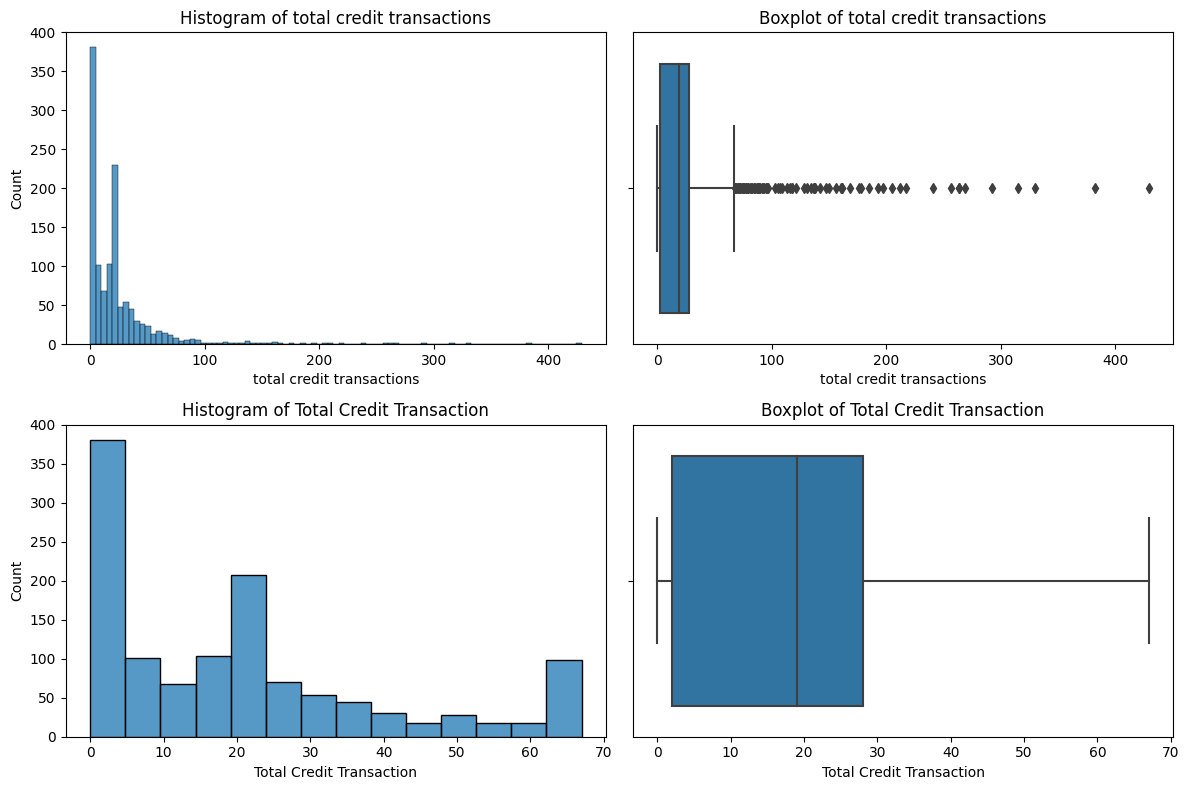

In [ ]:
# Create a figure with a 2x2 grid
plt.figure(figsize=(12, 8))

# Plot histogram of 'total credit transactions' in the first subplot
plt.subplot(2, 2, 1)
sns.histplot(x=small_org_interim['total credit transactions'])
plt.title('Histogram of total credit transactions')

# Plot boxplot of 'total credit transactions' in the second subplot
plt.subplot(2, 2, 2)
sns.boxplot(x=small_org_interim['total credit transactions'])
plt.title('Boxplot of total credit transactions')

# Plot histogram of 'Total Credit Transaction' in the third subplot
plt.subplot(2, 2, 3)
sns.histplot(x=small_org_interim['Total Credit Transaction'])
plt.title('Histogram of Total Credit Transaction')

# Plot boxplot of 'Total Credit Transaction' in the fourth subplot
plt.subplot(2, 2, 4)
sns.boxplot(x=small_org_interim['Total Credit Transaction'])
plt.title('Boxplot of Total Credit Transaction')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
# Calculate the 25th and 75th percentiles of the 'total transactions' column
percentile25 = small_org_interim['total transactions'].quantile(0.25)
percentile75 = small_org_interim['total transactions'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outlier detection
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Replace outliers in 'total transactions' with the upper or lower limit
small_org_interim['Total Transaction'] = np.where(small_org_interim['total transactions'] > upper_limit, upper_limit,
                                                  np.where(small_org_interim['total transactions'] < lower_limit, lower_limit,
                                                           small_org_interim['total transactions']))


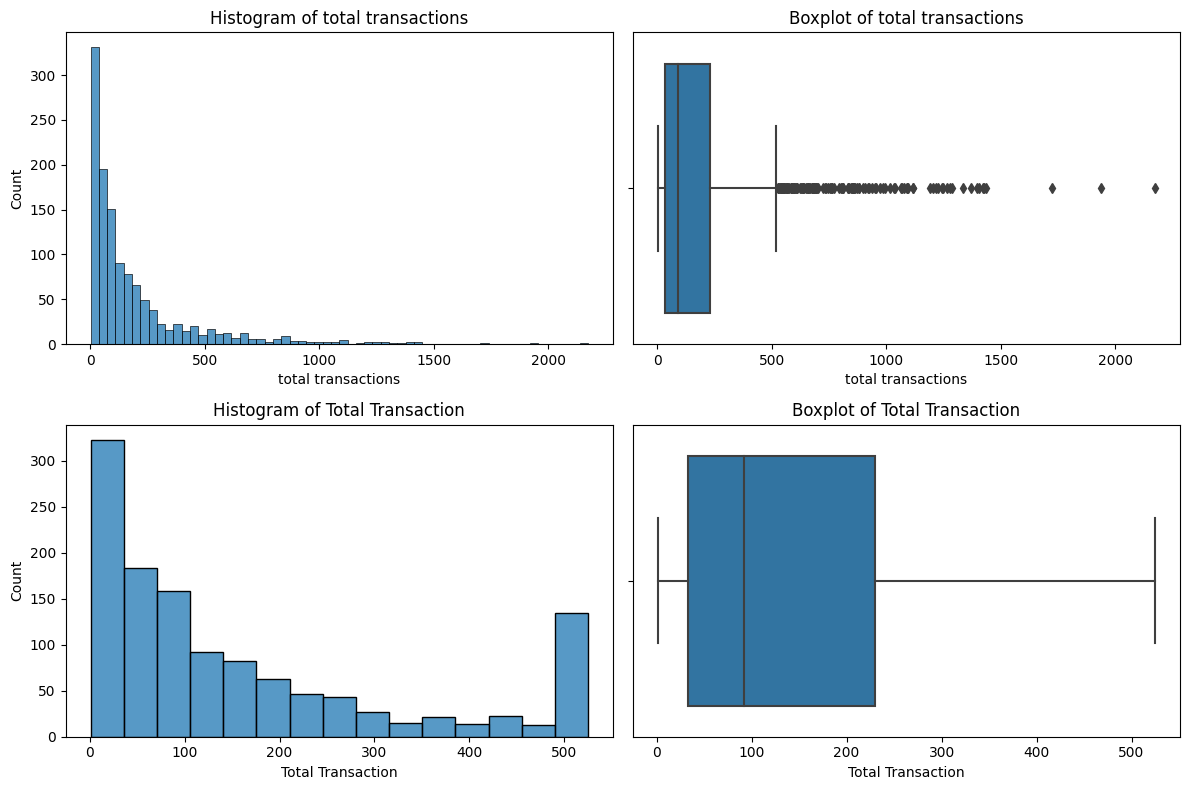

In [ ]:
# Create a figure with a 2x2 grid
plt.figure(figsize=(12, 8))

# Plot histogram of 'total transactions' in the first subplot
plt.subplot(2, 2, 1)
sns.histplot(x=small_org_interim['total transactions'])
plt.title('Histogram of total transactions')

# Plot boxplot of 'total transactions' in the second subplot
plt.subplot(2, 2, 2)
sns.boxplot(x=small_org_interim['total transactions'])
plt.title('Boxplot of total transactions')

# Plot histogram of 'Total Transaction' in the third subplot
plt.subplot(2, 2, 3)
sns.histplot(x=small_org_interim['Total Transaction'])
plt.title('Histogram of Total Transaction')

# Plot boxplot of 'Total Transaction' in the fourth subplot
plt.subplot(2, 2, 4)
sns.boxplot(x=small_org_interim['Total Transaction'])
plt.title('Boxplot of Total Transaction')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
small_org_interim

CIF              CUS_DOB  AGE  CUS_Month_Income CUS_Gender  \
0     XXXXXX  Feb 13 1970 12:00AM   49           7116.64       MALE   
1     XXXXXX  Sep 20 1973 12:00AM   46        1500000.00     FEMALE   
2     XXXXXX  Jul 18 1966 12:00AM   53        5000000.00     FEMALE   
3     XXXXXX  Jan  9 2004 12:00AM   15            500.00     FEMALE   
4     XXXXXX  Mar  7 1971 12:00AM   48        9000000.00     FEMALE   
...      ...                  ...  ...               ...        ...   
1244  XXXXXX  Sep 10 1951 12:00AM   68           4500.00       MALE   
1245  XXXXXX  Mar 23 1984 12:00AM   35        3500000.00       MALE   
1246  XXXXXX  Feb  4 1985 12:00AM   34           1000.00       MALE   
1247  XXXXXX  Feb  3 1950 12:00AM   69        2000000.00       MALE   
1248  XXXXXX  Feb 23 1961 12:00AM   58        5000000.00     FEMALE   

     CUS_Marital_Status CUS_Customer_Since  YEARS_WITH_US  \
0               MARRIED         1994-06-30             25   
1                SINGLE         2005-05-19             14   
2                SINGLE         2005-05-20             14   
3                SINGLE         2005-05-20             14   
4                SINGLE         2014-06-30              5   
...                 ...                ...            ...   
1244             SINGLE         2005-07-25             14   
1245             SINGLE         2005-07-27             14   
1246             SINGLE         2005-07-25             14   
1247             SINGLE         2005-07-26             14   
1248             SINGLE         2005-07-26             14   

      # total debit transactions for S1  # total debit transactions for S2  \
0                                   277                                265   
1                                    37                                 15   
2                                    31                                 14   
3                                     0                                  1   
4                                    15                                 33   
...                                 ...                                ...   
1244                                 13                                 12   
1245                                 55                                 35   
1246                                415                                368   
1247                                147                                202   
1248                                 76                                 88   

      ...  CUS_Target   TAR_Desc  Status  Tenure(years)  Monthly Income  \
0     ...        2231  EXECUTIVE  ACTIVE        24 - 26        7116.640   
1     ...        2223        LOW  ACTIVE        12 - 14     1500000.000   
2     ...        2222      MIDLE  ACTIVE        12 - 14     5000000.000   
3     ...        2223        LOW  ACTIVE        12 - 14         500.000   
4     ...        2223        LOW  ACTIVE          3 - 5     7488646.875   
...   ...         ...        ...     ...            ...             ...   
1244  ...        2223        LOW   CHURN        12 - 14        4500.000   
1245  ...        2222      MIDLE  ACTIVE        12 - 14     3500000.000   
1246  ...        2232      MIDLE  ACTIVE        12 - 14        1000.000   
1247  ...        2222      MIDLE  ACTIVE        12 - 14     2000000.000   
1248  ...        2222      MIDLE  ACTIVE        12 - 14     5000000.000   

      Total Debit Amount  Total Debit Transactions  Total Credit Amount  \
0           1.573451e+06                     456.0          1448493.325   
1           1.393632e+05                      97.0            87000.000   
2           3.737546e+04                      53.0          1020883.700   
3           4.000000e+03                       1.0            76946.960   
4           3.384703e+05                      60.0           442100.000   
...                  ...                       ...                  ...   
1244        5.645600e+03                      26.0          

In [ ]:
small_org_interim.describe()

AGE  CUS_Month_Income  YEARS_WITH_US  \
count  1238.000000      1.238000e+03    1238.000000   
mean     46.565428      2.764869e+06      14.054927   
std      11.967559      5.406761e+06       2.162042   
min      14.000000      0.000000e+00       0.000000   
25%      39.000000      7.568750e+03      14.000000   
50%      46.000000      1.500000e+06      14.000000   
75%      55.000000      3.000000e+06      14.000000   
max      89.000000      8.000000e+07      28.000000   

       # total debit transactions for S1  # total debit transactions for S2  \
count                        1238.000000                        1238.000000   
mean                           54.609047                          55.995153   
std                            80.999300                          81.285956   
min                             0.000000                           0.000000   
25%                             7.250000                           6.000000   
50%                            22.000000                          24.000000   
75%                            65.000000                          65.750000   
max                           715.000000                         547.000000   

       # total debit transactions for S3  total debit amount for S1  \
count                        1238.000000               1.238000e+03   
mean                           57.378837               3.171229e+05   
std                            84.900938               1.519922e+06   
min                             0.000000               0.000000e+00   
25%                             6.000000               1.195674e+04   
50%                            25.000000               5.434135e+04   
75%                            68.750000               1.906623e+05   
max                           757.000000               3.573349e+07   

       total debit amount for S2  total debit amount for S3  \
count               1.238000e+03               1.238000e+03   
mean                3.114345e+05               3.087207e+05   
std                 1.299411e+06               9.423388e+05   
min                 0.000000e+00               0.000000e+00   
25%                 1.123637e+04               7.608700e+03   
50%                 6.355581e+04               6.045000e+04   
75%                 2.132888e+05               2.272960e+05   
max                 3.723382e+07               1.866511e+07   

       # total credit transactions for S1  ...  total credit amount  \
count                         1238.000000  ...         1.238000e+03   
mean                             7.663974  ...         9.360193e+05   
std                             13.590328  ...         3.701020e+06   
min                              0.000000  ...         0.000000e+00   
25%                              0.000000  ...         1.600000e+04   
50%                              6.000000  ...         1.534129e+05   
75%                              8.000000  ...         5.889973e+05   
max                            189.000000  ...         1.043919e+08   

       total credit transactions  total transactions   CUS_Target  \
count                1238.000000         1238.000000  1238.000000   
mean                   24.721325          192.704362  2222.285137   
std                    38.589698          264.158219     3.314595   
min                     0.000000            1.000000  2211.000000   
25%                     2.000000           33.000000  2222.000000   
50%                    19.000000           92.000000  2223.000000   
75%                    28.000000          229.750000  2223.000000   
max                   429.000000         2174.000000  2236.000000   

       Monthly Income  Total Debit Amount  Total Debit Transactions  \
count    1.238000e+03        1.238000e+03               1238.000000   
mean     2.080267e+06        4.557607e+05                137.989499   
std      2.337868e+06        5.321504e+05                147.319792   
min      0.000000e+00        0.000000e+00            

In [ ]:
# Create a copy of the cleaned dataset to create a dataset of binned variables
small_org_binned = small_org_interim.copy()

In [ ]:
# Define the irregular bin edges for Tenure
bin_edges = [0, 5, 9, 13, 17, 20, np.inf]
labels = ["0-5", "6-9", "10-13", "14-17", "18-20", "20+"]

# Group the tenure into irregular bins
small_org_binned['Tenure(years)'] = pd.cut(small_org_interim['YEARS_WITH_US'], bins=bin_edges, labels=labels)

# Count the number of records in each tenure group
small_org_binned['Tenure(years)'].value_counts()

14-17    1076
10-13     100
20+        37
0-5        13
6-9         7
18-20       4
Name: Tenure(years), dtype: int64

In [ ]:
# Define the bin edges for Monthly income
labels = ["{0} - {1}".format(i, i + 114) for i in range(0, 850, 115)]

# Group the income into bins
small_org_binned['Monthly Income (x 10000)'] = pd.cut(small_org_interim['Monthly Income']/10000, range(0, 850, 115),
                                                     right=False,
                                        labels=labels[:-1])
# Count the number of records in each income group
small_org_binned['Monthly Income (x 10000)'].value_counts()

0 - 114      592
115 - 229    217
230 - 344    152
690 - 804    116
460 - 574     76
345 - 459     65
575 - 689     20
Name: Monthly Income (x 10000), dtype: int64

In [ ]:
# Define the bin edges for Age
labels = ["{0} - {1}".format(i, i + 14) for i in range(1, 100, 15)]

# Group the ages into bins
small_org_binned['Age'] = pd.cut(small_org_interim['AGE'], range(1, 100, 15), right=False, labels=labels[:-1])
# Count the number of records in each bin
small_org_binned['Age'].value_counts()

31 - 45    527
46 - 60    476
61 - 75    138
16 - 30     78
76 - 90     13
1 - 15       6
Name: Age, dtype: int64

In [ ]:
# Define the bin edges for Total debit amount
labels = ["{0} - {1}".format(i, i + 19) for i in range(0, 180, 20)]

# Group the total debit amount into bins of
small_org_binned['Total Debit Amount (x 10000)'] = pd.cut(small_org_interim['Total Debit Amount']/10000,
                                                         range(0, 180, 20), right=False, labels=labels[:-1])
# Count the number of records in each bin
small_org_binned['Total Debit Amount (x 10000)'].value_counts()

0 - 19       610
20 - 39      185
140 - 159    171
40 - 59      111
60 - 79       65
80 - 99       47
100 - 119     28
120 - 139     21
Name: Total Debit Amount (x 10000), dtype: int64

In [ ]:
# Define the bin edges for Total debit transactions
labels = ["{0} - {1}".format(i, i + 99) for i in range(0, 600, 100)]

# Group the debit transactions into bins
small_org_binned['Total Debit Transactions'] = pd.cut(small_org_interim['Total Debit Transactions'], range(0, 600, 100),
                                                      right=False, labels=labels[:-1])
# Count the number of records in each bin
small_org_binned['Total Debit Transactions'].value_counts()

0 - 99       705
100 - 199    226
400 - 499    150
200 - 299     95
300 - 399     62
Name: Total Debit Transactions, dtype: int64

In [ ]:
# Define the bin edges for Total credit amount
labels = ["{0} - {1}".format(i, i + 19) for i in range(0, 180, 20)]

# Group the total credit amount into bins
small_org_binned['Total Credit Amount (x 10000)'] = pd.cut(small_org_interim['Total Credit Amount']/10000,
                                                          range(0, 180, 20), right=False, labels=labels[:-1])
# Count the number of records in each bin
small_org_binned['Total Credit Amount (x 10000)'].value_counts()

0 - 19       678
140 - 159    172
20 - 39      160
40 - 59       97
80 - 99       44
60 - 79       40
100 - 119     25
120 - 139     22
Name: Total Credit Amount (x 10000), dtype: int64

In [ ]:
# Define the bin edges for Total credit transactions
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 80, 10)]

# Group the total credit transactions into bins
small_org_binned['Total Credit Transaction'] = pd.cut(small_org_interim['Total Credit Transaction'], range(0, 80, 10),
                                                      right=False, labels=labels[:-1])
# Count the number of records in each bin
small_org_binned['Total Credit Transaction'].value_counts()

0 - 9      482
20 - 29    288
10 - 19    171
60 - 69    108
30 - 39     97
40 - 49     53
50 - 59     39
Name: Total Credit Transaction, dtype: int64

In [ ]:
# Define the bin edges for Total transactions
labels = ["{0} - {1}".format(i, i + 99) for i in range(0, 700, 100)]

# Group the total transactions into bins
small_org_binned['Total Transaction'] = pd.cut(small_org_interim['Total Transaction'], range(0, 700, 100),
                                          right=False, labels=labels[:-1])
# Count the number of records in each bin
small_org_binned['Total Transaction'].value_counts()

0 - 99       646
100 - 199    242
500 - 599    135
200 - 299    120
300 - 399     53
400 - 499     42
Name: Total Transaction, dtype: int64

In [ ]:
small_org_binned

CIF              CUS_DOB  AGE  CUS_Month_Income CUS_Gender  \
0     XXXXXX  Feb 13 1970 12:00AM   49           7116.64       MALE   
1     XXXXXX  Sep 20 1973 12:00AM   46        1500000.00     FEMALE   
2     XXXXXX  Jul 18 1966 12:00AM   53        5000000.00     FEMALE   
3     XXXXXX  Jan  9 2004 12:00AM   15            500.00     FEMALE   
4     XXXXXX  Mar  7 1971 12:00AM   48        9000000.00     FEMALE   
...      ...                  ...  ...               ...        ...   
1244  XXXXXX  Sep 10 1951 12:00AM   68           4500.00       MALE   
1245  XXXXXX  Mar 23 1984 12:00AM   35        3500000.00       MALE   
1246  XXXXXX  Feb  4 1985 12:00AM   34           1000.00       MALE   
1247  XXXXXX  Feb  3 1950 12:00AM   69        2000000.00       MALE   
1248  XXXXXX  Feb 23 1961 12:00AM   58        5000000.00     FEMALE   

     CUS_Marital_Status CUS_Customer_Since  YEARS_WITH_US  \
0               MARRIED         1994-06-30             25   
1                SINGLE         2005-05-19             14   
2                SINGLE         2005-05-20             14   
3                SINGLE         2005-05-20             14   
4                SINGLE         2014-06-30              5   
...                 ...                ...            ...   
1244             SINGLE         2005-07-25             14   
1245             SINGLE         2005-07-27             14   
1246             SINGLE         2005-07-25             14   
1247             SINGLE         2005-07-26             14   
1248             SINGLE         2005-07-26             14   

      # total debit transactions for S1  # total debit transactions for S2  \
0                                   277                                265   
1                                    37                                 15   
2                                    31                                 14   
3                                     0                                  1   
4                                    15                                 33   
...                                 ...                                ...   
1244                                 13                                 12   
1245                                 55                                 35   
1246                                415                                368   
1247                                147                                202   
1248                                 76                                 88   

      ...  Monthly Income  Total Debit Amount  Total Debit Transactions  \
0     ...        7116.640        1.573451e+06                 400 - 499   
1     ...     1500000.000        1.393632e+05                    0 - 99   
2     ...     5000000.000        3.737546e+04                    0 - 99   
3     ...         500.000        4.000000e+03                    0 - 99   
4     ...     7488646.875        3.384703e+05                    0 - 99   
...   ...             ...                 ...                       ...   
1244  ...        4500.000        5.645600e+03                    0 - 99   
1245  ...     3500000.000        3.857359e+05                 100 - 199   
1246  ...        1000.000        1.573451e+06                 400 - 499   
1247  ...     2000000.000        1.371852e+06                 400 - 499   
1248  ...     5000000.000        7.618279e+05                 200 - 299   

      Total Credit Amount  Total Credit Transaction  Total Transaction  \
0             1448493.325                   60 - 69          500 - 599   
1               87000.000                   10 - 19          100 - 199   
2             1020883.700                   20 - 29             0 - 99   
3               76946.960                   10 - 19             0 - 99   
4              442100.000                   20 - 29             0 - 99   
...                   ...                       ...                ...   
1244                0.000                     0 - 9             0 -

In [ ]:
#small_org_binned['YEARS_WITH_US'].value_counts()

In [ ]:
# Select columns from index 27 to the end of the DataFrame and store them in 'small_org_binned'
small_org_binned = small_org_binned.iloc[:, 27:]

# Drop undesired columns and update 'small_org_binned' to reflect the changes
small_org_binned = small_org_binned.drop(columns=['Monthly Income',
                                                  'Total Debit Amount',
                                                  'Total Credit Amount'], axis=1)

# Assign the values from the 'CUS_Gender' column in 'small_org_interim' to the 'Gender' column in 'small_org_binned'
small_org_binned['Gender'] = small_org_interim['CUS_Gender']

# Display the resulting DataFrame 'small_org_binned'
small_org_binned


Status Tenure(years) Total Debit Transactions Total Credit Transaction  \
0     ACTIVE           20+                400 - 499                  60 - 69   
1     ACTIVE         14-17                   0 - 99                  10 - 19   
2     ACTIVE         14-17                   0 - 99                  20 - 29   
3     ACTIVE         14-17                   0 - 99                  10 - 19   
4     ACTIVE           0-5                   0 - 99                  20 - 29   
...      ...           ...                      ...                      ...   
1244   CHURN         14-17                   0 - 99                    0 - 9   
1245  ACTIVE         14-17                100 - 199                  20 - 29   
1246  ACTIVE         14-17                400 - 499                  60 - 69   
1247  ACTIVE         14-17                400 - 499                  40 - 49   
1248  ACTIVE         14-17                200 - 299                  30 - 39   

     Total Transaction Monthly Income (x 10000)      Age  \
0            500 - 599                  0 - 114  46 - 60   
1            100 - 199                115 - 229  46 - 60   
2               0 - 99                460 - 574  46 - 60   
3               0 - 99                  0 - 114   1 - 15   
4               0 - 99                690 - 804  46 - 60   
...                ...                      ...      ...   
1244            0 - 99                  0 - 114  61 - 75   
1245         100 - 199                345 - 459  31 - 45   
1246         500 - 599                  0 - 114  31 - 45   
1247         500 - 599                115 - 229  61 - 75   
1248         200 - 299                460 - 574  46 - 60   

     Total Debit Amount (x 10000) Total Credit Amount (x 10000)  Gender  
0                       140 - 159                     140 - 159    MALE  
1                          0 - 19                        0 - 19  FEMALE  
2                          0 - 19                     100 - 119  FEMALE  
3                          0 - 19                        0 - 19  FEMALE  
4                         20 - 39                       40 - 59  FEMALE  
...                           ...                           ...     ...  
1244                       0 - 19                        0 - 19    MALE  
1245                      20 - 39                       60 - 79    MALE  
1246                    140 - 159                     140 - 159    MALE  
1247                    120 - 139                     120 - 139    MALE  
1248                      60 - 79                       60 - 79  FEMALE  

[1238 rows x 10 columns]

<ipython-input-42-e2eee548ceb7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(small_org_interim.corr(), cmap="crest")


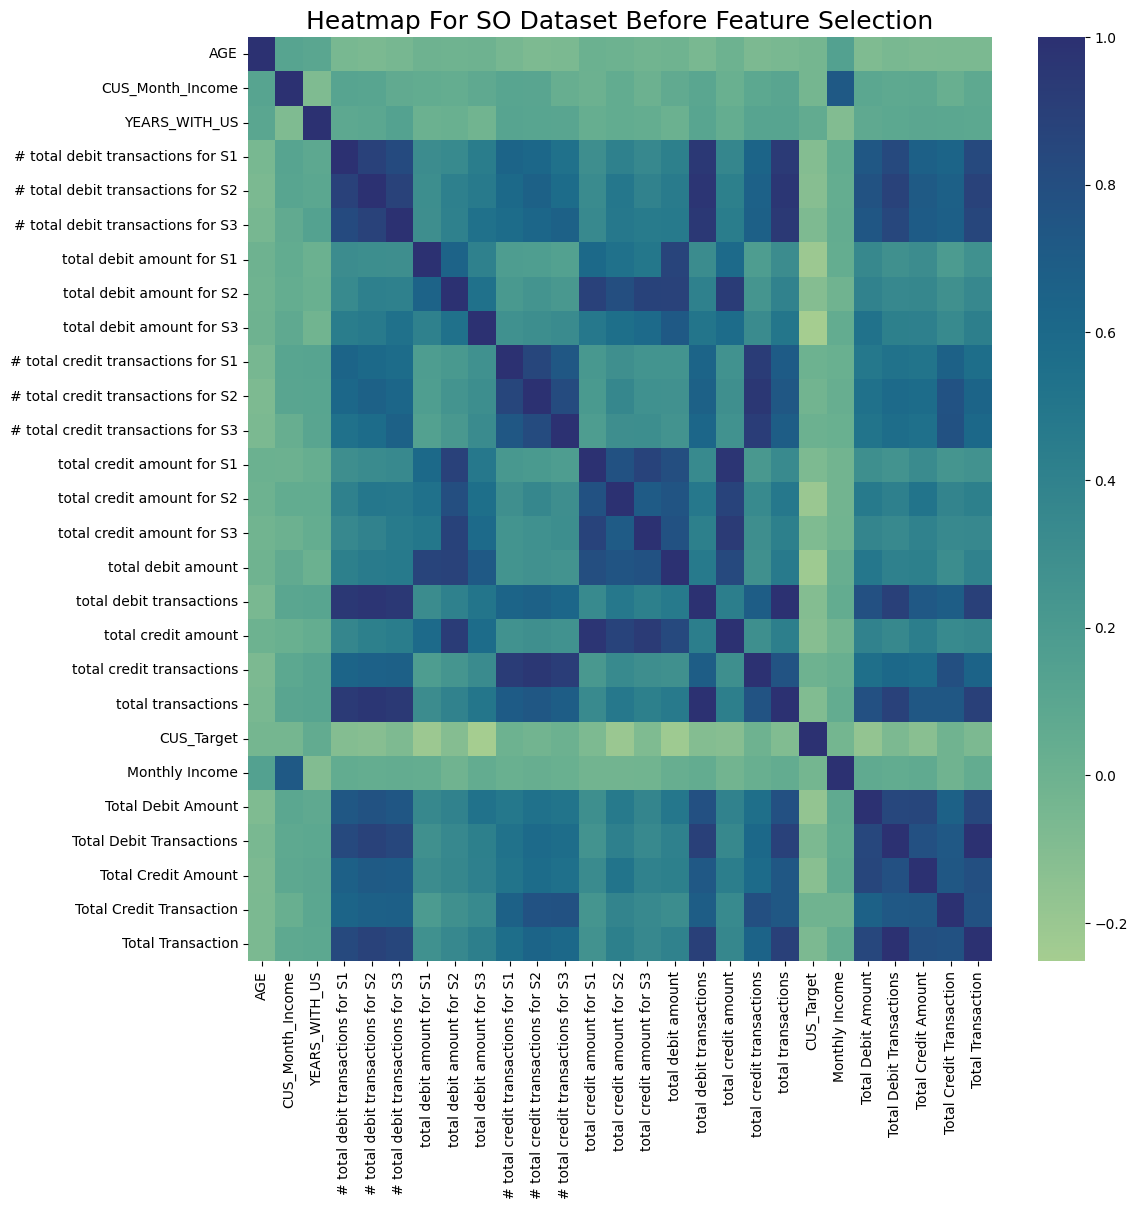

In [ ]:
# Create a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(small_org_interim.corr(), cmap="crest")

# Set the title
plt.title('Heatmap For SO Dataset Before Feature Selection', size=18)

# Display the plot
plt.show()

In [ ]:
small_org_interim.columns

Index(['CIF', 'CUS_DOB', 'AGE', 'CUS_Month_Income', 'CUS_Gender',
       'CUS_Marital_Status', 'CUS_Customer_Since', 'YEARS_WITH_US',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status', 'Tenure(years)', 'Monthly Income',
       'Total Debit Amount', 'Total Debit Transactions', 'Total Credit Amount',
       'Total Credit Transaction', 'Total Transaction'],
      dtype='object')

In [ ]:
#drop irrelevant columns
small_org_capped = small_org_interim.drop(columns = ['CIF', 'CUS_DOB', 'CUS_Month_Income',
                                                     'CUS_Customer_Since',
                                                     '# total debit transactions for S1',
                                                     '# total debit transactions for S2',
                                                     '# total debit transactions for S3',
                                                     'total debit amount for S1', 'total debit amount for S2',
                                                     'total debit amount for S3', '# total credit transactions for S1',
                                                     '# total credit transactions for S2',
                                                     '# total credit transactions for S3', 'total credit amount for S1',
                                                     'total credit amount for S2', 'total credit amount for S3',
                                                     'total debit amount', 'total debit transactions', 'total credit amount',
                                                     'total credit transactions', 'total transactions', 'CUS_Target',
                                                     'Total Debit Amount', 'Total Credit Amount',
                                                     'Total Transaction'

                                                     ], axis=1)
small_org_capped

AGE CUS_Gender CUS_Marital_Status  YEARS_WITH_US   TAR_Desc  Status  \
0      49       MALE            MARRIED             25  EXECUTIVE  ACTIVE   
1      46     FEMALE             SINGLE             14        LOW  ACTIVE   
2      53     FEMALE             SINGLE             14      MIDLE  ACTIVE   
3      15     FEMALE             SINGLE             14        LOW  ACTIVE   
4      48     FEMALE             SINGLE              5        LOW  ACTIVE   
...   ...        ...                ...            ...        ...     ...   
1244   68       MALE             SINGLE             14        LOW   CHURN   
1245   35       MALE             SINGLE             14      MIDLE  ACTIVE   
1246   34       MALE             SINGLE             14      MIDLE  ACTIVE   
1247   69       MALE             SINGLE             14      MIDLE  ACTIVE   
1248   58     FEMALE             SINGLE             14      MIDLE  ACTIVE   

     Tenure(years)  Monthly Income  Total Debit Transactions  \
0          24 - 26        7116.640                     456.0   
1          12 - 14     1500000.000                      97.0   
2          12 - 14     5000000.000                      53.0   
3          12 - 14         500.000                       1.0   
4            3 - 5     7488646.875                      60.0   
...            ...             ...                       ...   
1244       12 - 14        4500.000                      26.0   
1245       12 - 14     3500000.000                     127.0   
1246       12 - 14        1000.000                     456.0   
1247       12 - 14     2000000.000                     456.0   
1248       12 - 14     5000000.000                     233.0   

      Total Credit Transaction  
0                         65.0  
1                         10.0  
2                         27.0  
3                         12.0  
4                         21.0  
...                        ...  
1244                       0.0  
1245                      22.0  
1246                      67.0  
1247                      48.0  
1248                      37.0  

[1238 rows x 10 columns]

In [ ]:
#rename columns
column_dict = {'AGE':'Age',
               'CUS_Gender':'Gender',
               'CUS_Marital_Status':'Marital Status',
               'YEARS_WITH_US':'Tenure (years)',
               'TAR_Desc':'Level'
              }
small_org_capped = small_org_capped.rename(columns=column_dict)
small_org_capped

Age  Gender Marital Status  Tenure (years)      Level  Status  \
0      49    MALE        MARRIED              25  EXECUTIVE  ACTIVE   
1      46  FEMALE         SINGLE              14        LOW  ACTIVE   
2      53  FEMALE         SINGLE              14      MIDLE  ACTIVE   
3      15  FEMALE         SINGLE              14        LOW  ACTIVE   
4      48  FEMALE         SINGLE               5        LOW  ACTIVE   
...   ...     ...            ...             ...        ...     ...   
1244   68    MALE         SINGLE              14        LOW   CHURN   
1245   35    MALE         SINGLE              14      MIDLE  ACTIVE   
1246   34    MALE         SINGLE              14      MIDLE  ACTIVE   
1247   69    MALE         SINGLE              14      MIDLE  ACTIVE   
1248   58  FEMALE         SINGLE              14      MIDLE  ACTIVE   

     Tenure(years)  Monthly Income  Total Debit Transactions  \
0          24 - 26        7116.640                     456.0   
1          12 - 14     1500000.000                      97.0   
2          12 - 14     5000000.000                      53.0   
3          12 - 14         500.000                       1.0   
4            3 - 5     7488646.875                      60.0   
...            ...             ...                       ...   
1244       12 - 14        4500.000                      26.0   
1245       12 - 14     3500000.000                     127.0   
1246       12 - 14        1000.000                     456.0   
1247       12 - 14     2000000.000                     456.0   
1248       12 - 14     5000000.000                     233.0   

      Total Credit Transaction  
0                         65.0  
1                         10.0  
2                         27.0  
3                         12.0  
4                         21.0  
...                        ...  
1244                       0.0  
1245                      22.0  
1246                      67.0  
1247                      48.0  
1248                      37.0  

[1238 rows x 10 columns]

<ipython-input-46-2491f45320ab>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(small_org_capped.corr(), cmap="crest", annot=True)


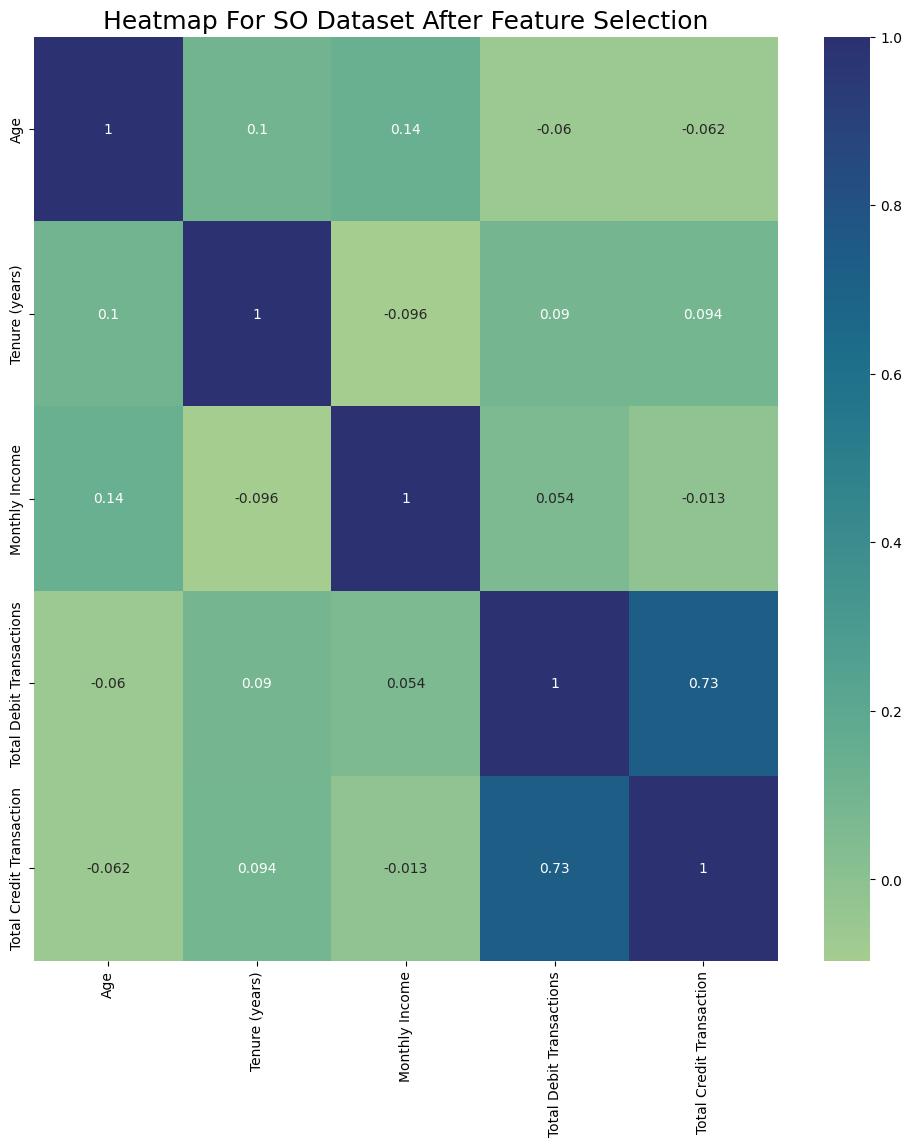

In [ ]:
# Create a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(small_org_capped.corr(), cmap="crest", annot=True)

# Set the title
plt.title('Heatmap For SO Dataset After Feature Selection', size=18)

# Display the plot
plt.show()

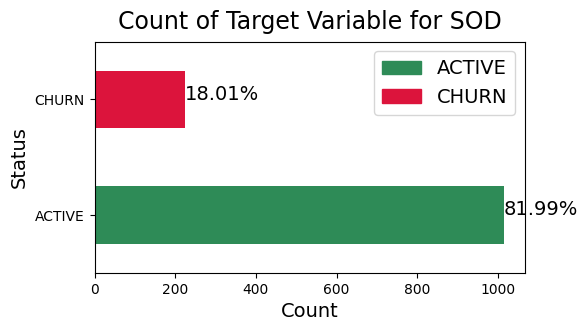

In [ ]:
# Compute the value counts of the target variable
target_var = small_org_capped['Status'].value_counts()

# Set the figure size
plt.figure(figsize=(4, 3))

# Define the colors for the bars and legend
bar_colors = ['seagreen', 'crimson']
legend_colors = bar_colors[:len(target_var)]

# Plot the count plot with different bar colors
plt.subplots_adjust(right=1.2)
ax = target_var.plot(kind='barh', color=bar_colors)
plt.xlabel("Count", size=14)
plt.ylabel("Status", size=14)

# Add percentage count labels to each bar
total = target_var.sum()
for i, count in enumerate(target_var):
    percentage = f'{(count / total) * 100:.2f}%'
    ax.text(count, i, f"{percentage}", size=14)

# Create custom legend
legend_labels = ['ACTIVE', 'CHURN']
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_patches, fontsize=14)

plt.title("Count of Target Variable for SOD", y=1.02, size=17)
# Display the plot
plt.show()


In [ ]:
small_org_capped['Status'].value_counts()

ACTIVE    1015
CHURN      223
Name: Status, dtype: int64

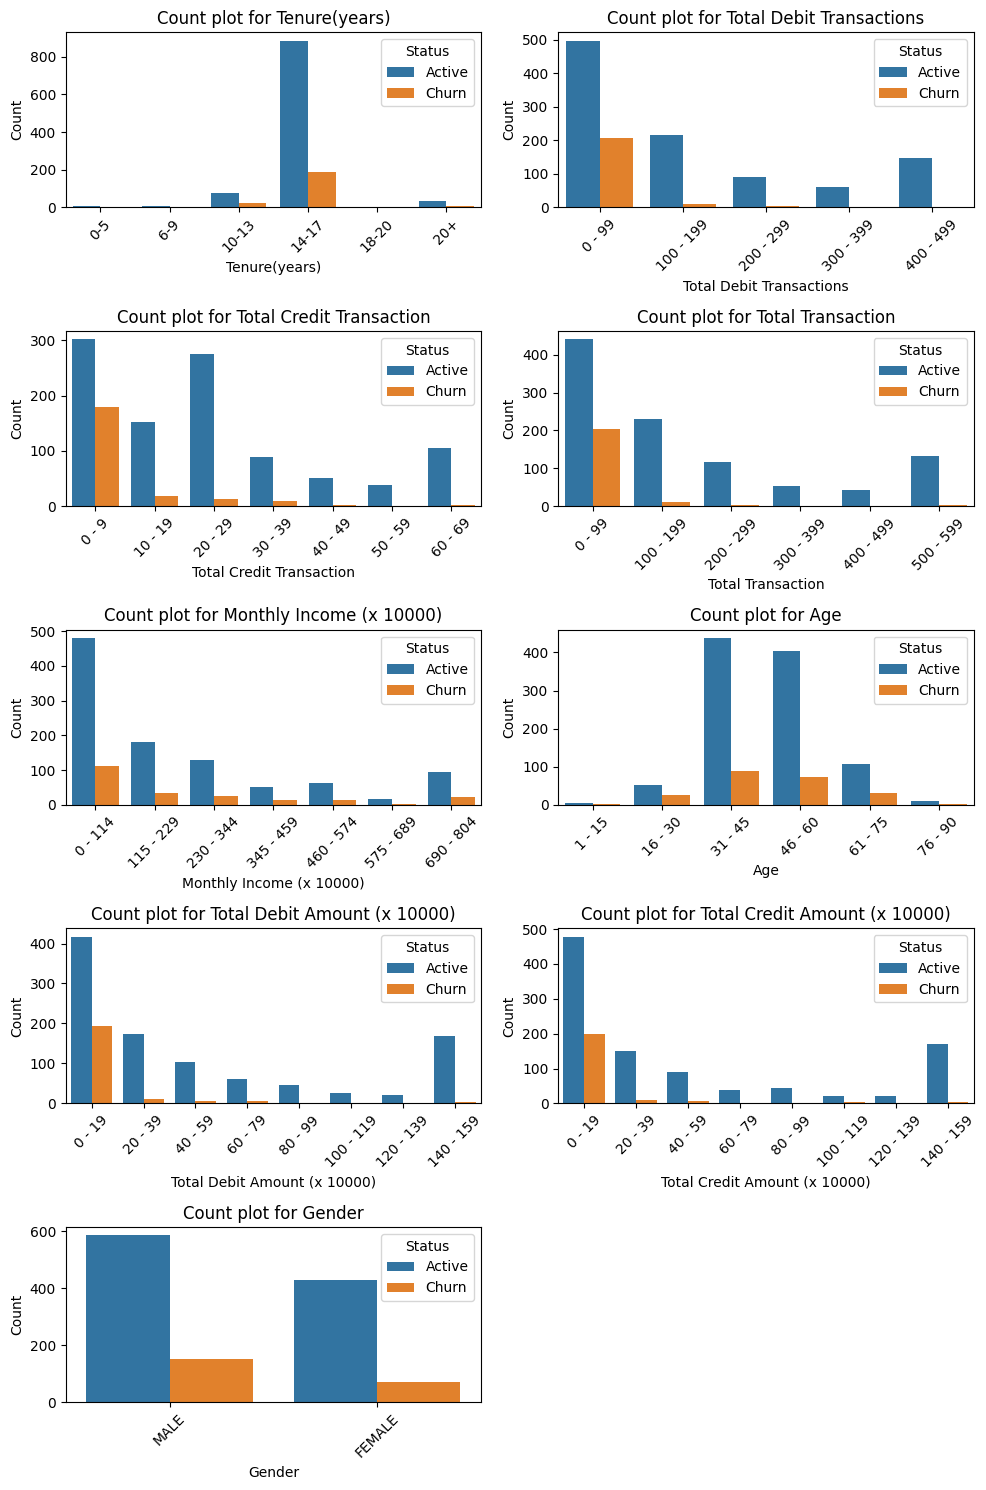

In [ ]:
#carry out univariate analysis

# Create subplots
fig, axs = plt.subplots(5, 2, figsize=(10, 15))

# Flatten the axs array for easy iteration
axs = axs.flatten()

scope = small_org_binned.drop(columns=['Status']).columns

# Iterate over predictors and create count plots on each subplot
for i, predictor in enumerate(scope):
    ax = axs[i]
    sns.countplot(data=small_org_binned, x=predictor, hue='Status', ax=ax)
    ax.set_title(f'Count plot for {predictor}')
    ax.legend(title='Status', labels=['Active', 'Churn'], loc='upper right')
    ax.set_xlabel(predictor)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove the blank subplot if the number of columns is odd
if len(scope) % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


In [ ]:
#Convert the target variable 'Churn' into a binary numeric variable i.e. Churn=1 ; Active = 0
small_org_capped['Status'] = np.where(small_org_capped.Status == 'CHURN',1,0)
small_org_capped

Age  Gender Marital Status  Tenure (years)      Level  Status  \
0      49    MALE        MARRIED              25  EXECUTIVE       0   
1      46  FEMALE         SINGLE              14        LOW       0   
2      53  FEMALE         SINGLE              14      MIDLE       0   
3      15  FEMALE         SINGLE              14        LOW       0   
4      48  FEMALE         SINGLE               5        LOW       0   
...   ...     ...            ...             ...        ...     ...   
1244   68    MALE         SINGLE              14        LOW       1   
1245   35    MALE         SINGLE              14      MIDLE       0   
1246   34    MALE         SINGLE              14      MIDLE       0   
1247   69    MALE         SINGLE              14      MIDLE       0   
1248   58  FEMALE         SINGLE              14      MIDLE       0   

     Tenure(years)  Monthly Income  Total Debit Transactions  \
0          24 - 26        7116.640                     456.0   
1          12 - 14     1500000.000                      97.0   
2          12 - 14     5000000.000                      53.0   
3          12 - 14         500.000                       1.0   
4            3 - 5     7488646.875                      60.0   
...            ...             ...                       ...   
1244       12 - 14        4500.000                      26.0   
1245       12 - 14     3500000.000                     127.0   
1246       12 - 14        1000.000                     456.0   
1247       12 - 14     2000000.000                     456.0   
1248       12 - 14     5000000.000                     233.0   

      Total Credit Transaction  
0                         65.0  
1                         10.0  
2                         27.0  
3                         12.0  
4                         21.0  
...                        ...  
1244                       0.0  
1245                      22.0  
1246                      67.0  
1247                      48.0  
1248                      37.0  

[1238 rows x 10 columns]

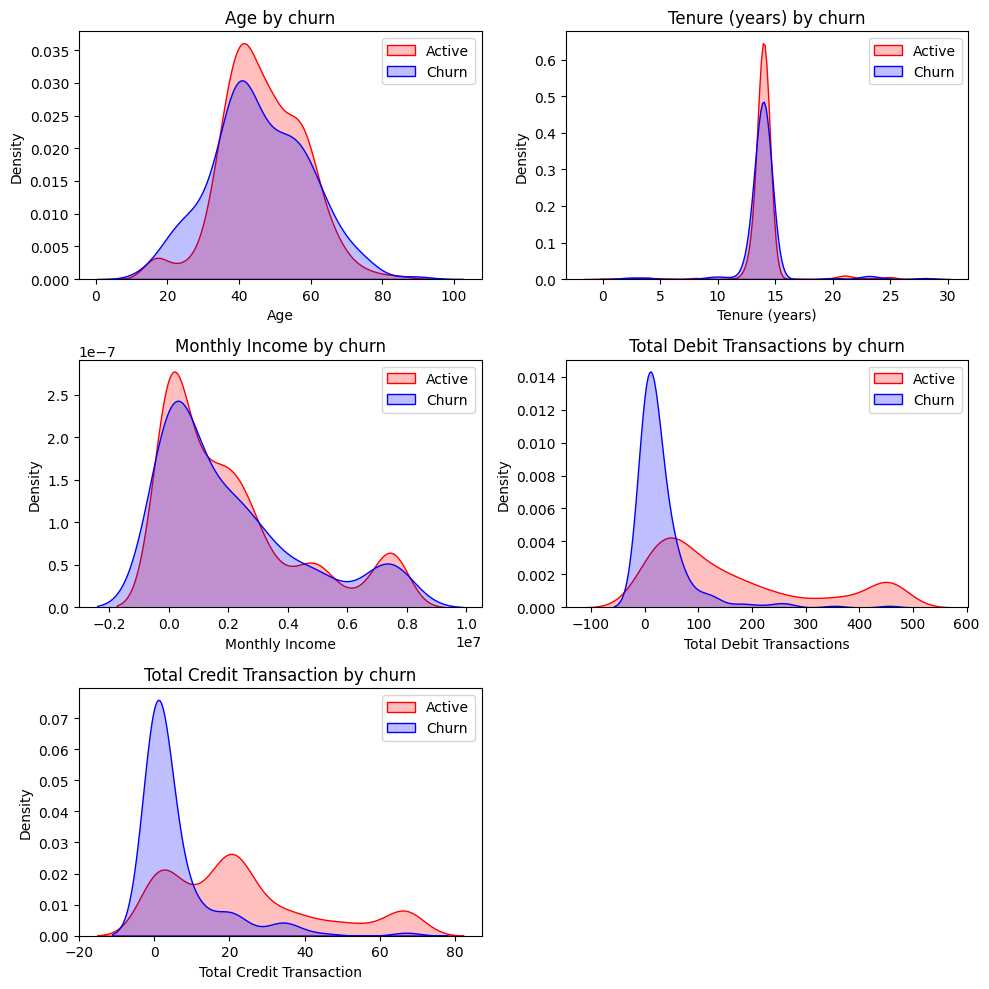

In [ ]:
# Create a 4x2 grid of subplots with a figure size of 10x10
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# List of columns to be plotted
columns = ['Age', 'Tenure (years)', 'Monthly Income', 'Total Debit Transactions',
           'Total Credit Transaction']

# Loop through each column and plot the KDE plots for active and churned data
for i, column in enumerate(columns):
    ax = axs[i]
    active_data = small_org_capped.loc[small_org_capped["Status"] == 0, column]
    churned_data = small_org_capped.loc[small_org_capped["Status"] == 1, column]
    sns.kdeplot(active_data, color="Red", fill=True, ax=ax)
    sns.kdeplot(churned_data, color="Blue", fill=True, ax=ax)
    ax.legend(["Active", "Churn"], loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(column)
    ax.set_title(f'{column} by churn')

# Remove the blank subplot if the number of columns is odd
if len(columns) % 2 != 0:
    fig.delaxes(axs[-1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
#Convert all the categorical variables into dummy variables
small_org_capped_dummies = pd.get_dummies(small_org_capped)
small_org_capped_dummies

Age  Tenure (years)  Status  Monthly Income  Total Debit Transactions  \
0      49              25       0        7116.640                     456.0   
1      46              14       0     1500000.000                      97.0   
2      53              14       0     5000000.000                      53.0   
3      15              14       0         500.000                       1.0   
4      48               5       0     7488646.875                      60.0   
...   ...             ...     ...             ...                       ...   
1244   68              14       1        4500.000                      26.0   
1245   35              14       0     3500000.000                     127.0   
1246   34              14       0        1000.000                     456.0   
1247   69              14       0     2000000.000                     456.0   
1248   58              14       0     5000000.000                     233.0   

      Total Credit Transaction  Gender_FEMALE  Gender_MALE  \
0                         65.0              0            1   
1                         10.0              1            0   
2                         27.0              1            0   
3                         12.0              1            0   
4                         21.0              1            0   
...                        ...            ...          ...   
1244                       0.0              0            1   
1245                      22.0              0            1   
1246                      67.0              0            1   
1247                      48.0              0            1   
1248                      37.0              1            0   

      Marital Status_DIVORCE  Marital Status_MARRIED  ...  \
0                          0                       1  ...   
1                          0                       0  ...   
2                          0                       0  ...   
3                          0                       0  ...   
4                          0                       0  ...   
...                      ...                     ...  ...   
1244                       0                       0  ...   
1245                       0                       0  ...   
1246                       0                       0  ...   
1247                       0                       0  ...   
1248                       0                       0  ...   

      Tenure(years)_3 - 5  Tenure(years)_6 - 8  Tenure(years)_9 - 11  \
0                       0                    0                     0   
1                       0                    0                     0   
2                       0                    0                     0   
3                       0                    0                     0   
4                       1                    0                     0   
...                   ...                  ...                   ...   
1244                    0                    0                     0   
1245                    0                    0                     0   
1246                    0                    0                     0   
1247                    0                    0                     0   
1248                    0                    0                     0   

      Tenure(years)_12 - 14  Tenure(years)_15 - 17  Tenure(years)_18 - 20  \
0                         0                      0                      0   
1                         1                      0                      0   
2                         1                      0                      0   
3                         1                      0                      0   
4                         0                      0                      0   
...                     ...                    ...                    ...   
1244                      1                      0                      0   
1245                      1                      0                      0   
1246                 

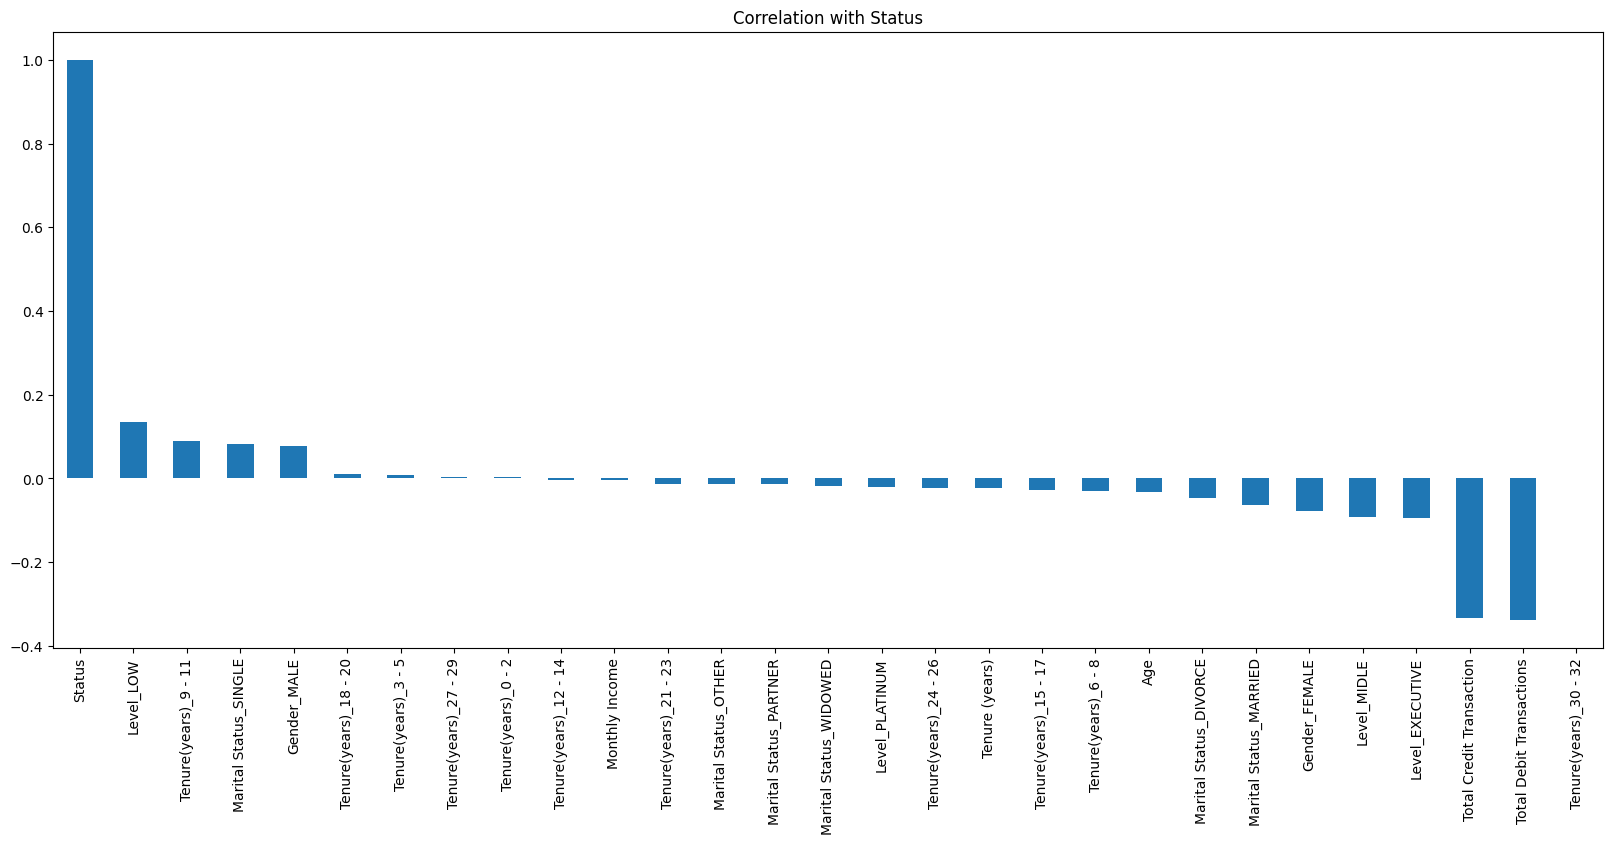

In [ ]:
# Create a correlation plot for 'Status' with other features
plt.figure(figsize=(20, 8))

# Calculate the correlation between 'Status' and other features and sort in descending order
correlation_sorted = small_org_capped_dummies.corr()['Status'].sort_values(ascending=False)

# Plot the sorted correlation values as a bar plot
correlation_sorted.plot(kind='bar')

# Set the title for the plot
plt.title('Correlation with Status')

# Display the plot
plt.show()


In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler to the data
scaler.fit(small_org_capped_dummies)

# Transform the data using the fitted scaler
scaled = scaler.transform(small_org_capped_dummies)

# Create a DataFrame with the scaled data, using the original column names
scaled_df = pd.DataFrame(scaled, columns=small_org_capped_dummies.columns)

# Display the scaled DataFrame
scaled_df


Age  Tenure (years)  Status  Monthly Income  \
0     0.466667        0.892857     0.0        0.000950   
1     0.426667        0.500000     0.0        0.200303   
2     0.520000        0.500000     0.0        0.667677   
3     0.013333        0.500000     0.0        0.000067   
4     0.453333        0.178571     0.0        1.000000   
...        ...             ...     ...             ...   
1233  0.720000        0.500000     1.0        0.000601   
1234  0.280000        0.500000     0.0        0.467374   
1235  0.266667        0.500000     0.0        0.000134   
1236  0.733333        0.500000     0.0        0.267071   
1237  0.586667        0.500000     0.0        0.667677   

      Total Debit Transactions  Total Credit Transaction  Gender_FEMALE  \
0                     1.000000                  0.970149            0.0   
1                     0.212719                  0.149254            1.0   
2                     0.116228                  0.402985            1.0   
3                     0.002193                  0.179104            1.0   
4                     0.131579                  0.313433            1.0   
...                        ...                       ...            ...   
1233                  0.057018                  0.000000            0.0   
1234                  0.278509                  0.328358            0.0   
1235                  1.000000                  1.000000            0.0   
1236                  1.000000                  0.716418            0.0   
1237                  0.510965                  0.552239            1.0   

      Gender_MALE  Marital Status_DIVORCE  Marital Status_MARRIED  ...  \
0             1.0                     0.0                     1.0  ...   
1             0.0                     0.0                     0.0  ...   
2             0.0                     0.0                     0.0  ...   
3             0.0                     0.0                     0.0  ...   
4             0.0                     0.0                     0.0  ...   
...           ...                     ...                     ...  ...   
1233          1.0                     0.0                     0.0  ...   
1234          1.0                     0.0                     0.0  ...   
1235          1.0                     0.0                     0.0  ...   
1236          1.0                     0.0                     0.0  ...   
1237          0.0                     0.0                     0.0  ...   

      Tenure(years)_3 - 5  Tenure(years)_6 - 8  Tenure(years)_9 - 11  \
0                     0.0                  0.0                   0.0   
1                     0.0                  0.0                   0.0   
2                     0.0                  0.0                   0.0   
3                     0.0                  0.0                   0.0   
4                     1.0                  0.0                   0.0   
...                   ...                  ...                   ...   
1233                  0.0                  0.0                   0.0   
1234                  0.0                  0.0                   0.0   
1235                  0.0                  0.0                   0.0   
1236                  0.0                  0.0                   0.0   
1237                  0.0                  0.0                   0.0   

      Tenure(years)_12 - 14  Tenure(years)_15 - 17  Tenure(years)_18 - 20  \
0                       0.0                    0.0                    0.0   
1                       1.0                    0.0                    0.0   
2                       1.0                    0.0                    0.0   
3                       1.0                    0.0                    0.0   
4                       0.0                    0.0                    0.0   
...                     ...                    ...                    ...   
1233                    1.0                    0.0                    0.0   
1234                    1.0                

In [ ]:
# Drop the status column and instantiate x2 as the determinant variables
x2 = scaled_df.drop('Status',axis=1)
x2

Age  Tenure (years)  Monthly Income  Total Debit Transactions  \
0     0.466667        0.892857        0.000950                  1.000000   
1     0.426667        0.500000        0.200303                  0.212719   
2     0.520000        0.500000        0.667677                  0.116228   
3     0.013333        0.500000        0.000067                  0.002193   
4     0.453333        0.178571        1.000000                  0.131579   
...        ...             ...             ...                       ...   
1233  0.720000        0.500000        0.000601                  0.057018   
1234  0.280000        0.500000        0.467374                  0.278509   
1235  0.266667        0.500000        0.000134                  1.000000   
1236  0.733333        0.500000        0.267071                  1.000000   
1237  0.586667        0.500000        0.667677                  0.510965   

      Total Credit Transaction  Gender_FEMALE  Gender_MALE  \
0                     0.970149            0.0          1.0   
1                     0.149254            1.0          0.0   
2                     0.402985            1.0          0.0   
3                     0.179104            1.0          0.0   
4                     0.313433            1.0          0.0   
...                        ...            ...          ...   
1233                  0.000000            0.0          1.0   
1234                  0.328358            0.0          1.0   
1235                  1.000000            0.0          1.0   
1236                  0.716418            0.0          1.0   
1237                  0.552239            1.0          0.0   

      Marital Status_DIVORCE  Marital Status_MARRIED  Marital Status_OTHER  \
0                        0.0                     1.0                   0.0   
1                        0.0                     0.0                   0.0   
2                        0.0                     0.0                   0.0   
3                        0.0                     0.0                   0.0   
4                        0.0                     0.0                   0.0   
...                      ...                     ...                   ...   
1233                     0.0                     0.0                   0.0   
1234                     0.0                     0.0                   0.0   
1235                     0.0                     0.0                   0.0   
1236                     0.0                     0.0                   0.0   
1237                     0.0                     0.0                   0.0   

      ...  Tenure(years)_3 - 5  Tenure(years)_6 - 8  Tenure(years)_9 - 11  \
0     ...                  0.0                  0.0                   0.0   
1     ...                  0.0                  0.0                   0.0   
2     ...                  0.0                  0.0                   0.0   
3     ...                  0.0                  0.0                   0.0   
4     ...                  1.0                  0.0                   0.0   
...   ...                  ...                  ...                   ...   
1233  ...                  0.0                  0.0                   0.0   
1234  ...                  0.0                  0.0                   0.0   
1235  ...                  0.0                  0.0                   0.0   
1236  ...                  0.0                  0.0                   0.0   
1237  ...                  0.0                  0.0                   0.0   

      Tenure(years)_12 - 14  Tenure(years)_15 - 17  Tenure(years)_18 - 20  \
0                       0.0                    0.0                    0.0   
1                       1.0                    0.0                    0.0   
2                       1.0                    0.0                    0.0   
3                       1.0                    0.0                    0.0   
4                       0.0                    0.0                    0.0   
...                     ...  

In [ ]:
# Instantiate y2 as the target variable - churn column
y2 = scaled_df['Status']

In [ ]:
# Check the distribution of the target classes within the dataset
y2.value_counts()

0.0    1015
1.0     223
Name: Status, dtype: int64

# **BUILDING THE MODELS**

**OPTION 1: USING THE IMBALANCED DATASET**

In [ ]:
# Split the data into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3,
                                                        random_state=123,
                                                        stratify=y2)

In [ ]:
x2_train.shape

(866, 28)

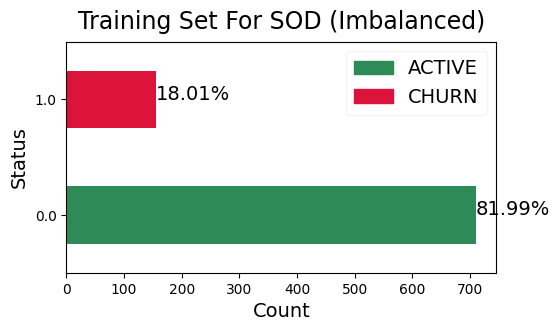

In [ ]:
# Compute the value counts of the target variable
target_var = y2_train.value_counts()

# Set the figure size
plt.figure(figsize=(4, 3))

# Define the colors for the bars and legend
bar_colors = ['seagreen', 'crimson']
legend_colors = bar_colors[:len(target_var)]

# Plot the count plot with different bar colors
plt.subplots_adjust(right=1.2)
ax = target_var.plot(kind='barh', color=bar_colors)
plt.xlabel("Count", size=14)
plt.ylabel("Status", size=14)

# Add percentage count labels to each bar
total = target_var.sum()
for i, count in enumerate(target_var):
    percentage = f'{(count / total) * 100:.2f}%'
    ax.text(count, i, f"{percentage}", size=14)

# Create custom legend
legend_labels = ['ACTIVE', 'CHURN']
legend_patches = [mpatches.Patch(color=color, label=label) for color,
                  label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_patches, loc='upper right', fontsize=14,
           framealpha=0.2)

plt.title("Training Set For SOD (Imbalanced)", y=1.02, size=17)
# Display the plot
plt.show()

# **Decision Tree classifier on Imbalanced Dataset...**

In [ ]:
#iterate through different depths and leaf to get that with the optimum accuracy
depth_list = list(range(1, 15))
leaf_list = list(range(1, 10))
DT_imb_results = np.zeros((len(depth_list) * len(leaf_list), 3))
index = 0

for depth in depth_list:
    for leaf in leaf_list:
        model_dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf)
        model_dt.fit(x2_train, y2_train)
        predictions = model_dt.predict(x2_test)
        accuracy = accuracy_score(y2_test, predictions)
        DT_imb_results[index] = [depth, leaf, accuracy]
        index += 1

col_names = ['Max_Depth', 'Min_Samples_Leaf', 'Accuracy']
DT_imb_results = pd.DataFrame(DT_imb_results, columns=col_names)
DT_imb_results

Max_Depth  Min_Samples_Leaf  Accuracy
0          1.0               1.0  0.819892
1          1.0               2.0  0.819892
2          1.0               3.0  0.819892
3          1.0               4.0  0.819892
4          1.0               5.0  0.819892
..         ...               ...       ...
121       14.0               5.0  0.790323
122       14.0               6.0  0.817204
123       14.0               7.0  0.811828
124       14.0               8.0  0.825269
125       14.0               9.0  0.830645

[126 rows x 3 columns]

In [ ]:
DT_imb_results[DT_imb_results['Accuracy'] == DT_imb_results['Accuracy'].max()]

Max_Depth  Min_Samples_Leaf  Accuracy
18        3.0               1.0  0.846774
19        3.0               2.0  0.846774
20        3.0               3.0  0.846774
21        3.0               4.0  0.846774
22        3.0               5.0  0.846774
23        3.0               6.0  0.846774
24        3.0               7.0  0.846774
25        3.0               8.0  0.846774
26        3.0               9.0  0.846774

In [ ]:
model_dt_scaled = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=2)

# Measure the training time
start_time = time.time()
model_dt_scaled.fit(x2_train,y2_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

In [ ]:
y_pred2 = model_dt_scaled.predict(x2_test)
dt_score_scaled = model_dt_scaled.score(x2_test, y2_test)
print(f"Training Time: {training_time:.4f} seconds")
print(dt_score_scaled)
print(classification_report(y2_test, y_pred2, labels=[0,1]))

Training Time: 0.0068 seconds
0.8467741935483871
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       305
           1       0.71      0.25      0.37        67

    accuracy                           0.85       372
   macro avg       0.78      0.62      0.64       372
weighted avg       0.83      0.85      0.82       372



In [ ]:
# DECISION TREE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y2_test, y_pred2)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_dt_df = pd.DataFrame(cm_dt,
                     index = ['CHURN','ACTIVE'],
                     columns = ['CHURN','ACTIVE'])
cm_dt_df

CHURN  ACTIVE
CHURN     298       7
ACTIVE     50      17

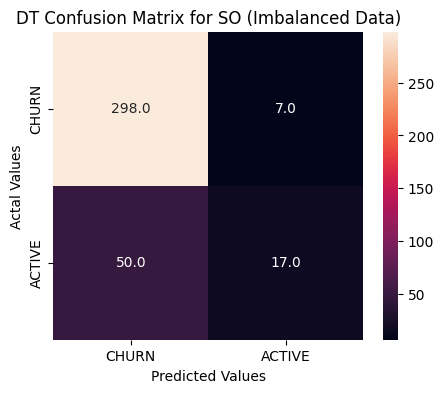

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt_df, annot=True, fmt=".1f")
plt.title('DT Confusion Matrix for SO (Imbalanced Data)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Compute prediction probablitities
dt_prob = model_dt_scaled.predict_proba(x2_test)
dt_prob = dt_prob[:,1]

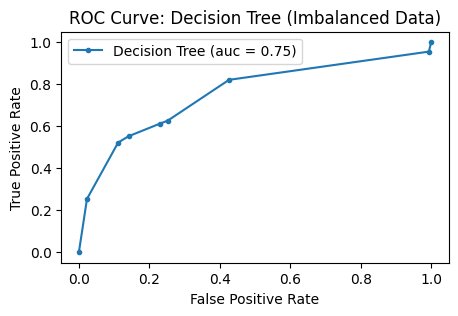

In [ ]:
# Calculate ROC curve and AUC using the binary labels
dt_fpr, dt_tpr, threshold = roc_curve(y2_test, dt_prob)
auc_dt = auc(dt_fpr, dt_tpr)

plt.figure(figsize=(5, 3), dpi=100)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (auc = %0.2f)' % auc_dt)

# Set the plot title
plt.title('ROC Curve: Decision Tree (Imbalanced Data)')

# Set the axes labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# **Random Forest Classifier on Imbalanced Dataset..**

In [ ]:
# Manually iterate through different depths and leaf nodes to find optimal accuracy
depth_list = list(range(1, 15))
leaf_list = list(range(1, 10))

# Create an array to store tuning results
RF_imb_results = np.zeros((len(depth_list) * len(leaf_list), 3))
index = 0

# Loop through different depth and leaf combinations
for depth in depth_list:
    for leaf in leaf_list:
        # Create a Random Forest model with the current hyperparameters
        model_rf = RandomForestClassifier(max_depth=depth, min_samples_leaf=leaf)
        model_rf.fit(x2_train, y2_train)

        # Make predictions on the test data
        predictions = model_rf.predict(x2_test)

        # Calculate accuracy score
        accuracy = accuracy_score(y2_test, predictions)

        # Store hyperparameters and accuracy in the RF_imb_results array
        RF_imb_results[index] = [depth, leaf, accuracy]
        index += 1

# Define column names for the results DataFrame
col_names = ['Max_Depth', 'Min_Samples_Leaf', 'Accuracy']

# Create a DataFrame from the RF_imb_results array
RF_imb_results_df = pd.DataFrame(RF_imb_results, columns=col_names)
RF_imb_results_df


Max_Depth  Min_Samples_Leaf  Accuracy
0          1.0               1.0  0.819892
1          1.0               2.0  0.819892
2          1.0               3.0  0.819892
3          1.0               4.0  0.819892
4          1.0               5.0  0.819892
..         ...               ...       ...
121       14.0               5.0  0.830645
122       14.0               6.0  0.819892
123       14.0               7.0  0.836022
124       14.0               8.0  0.825269
125       14.0               9.0  0.830645

[126 rows x 3 columns]

In [ ]:
RF_imb_results_df[RF_imb_results_df['Accuracy'] == RF_imb_results_df['Accuracy'].max()]

Max_Depth  Min_Samples_Leaf  Accuracy
62        7.0               9.0   0.83871
65        8.0               3.0   0.83871
83       10.0               3.0   0.83871
87       10.0               7.0   0.83871

In [ ]:
model_rf_scaled = RandomForestClassifier(max_depth=6, min_samples_leaf=9)

# Measure the training time
start_time = time.time()
model_rf_scaled.fit(x2_train,y2_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

In [ ]:
y2_pred_rf_scaled = model_rf_scaled.predict(x2_test)
rf_score_scaled = model_rf_scaled.score(x2_test, y2_test)
print(f"Training Time: {training_time:.4f} seconds")
print(rf_score_scaled)
print(metrics.classification_report(y2_test, y2_pred_rf_scaled))

Training Time: 0.2077 seconds
0.8225806451612904
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90       305
         1.0       0.53      0.15      0.23        67

    accuracy                           0.82       372
   macro avg       0.68      0.56      0.57       372
weighted avg       0.78      0.82      0.78       372



In [ ]:
cm_rf = confusion_matrix(y2_test, y2_pred_rf_scaled)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_rf_df = pd.DataFrame(cm_rf,
                     index = ['ACTIVE','CHURN'],
                     columns = ['ACTIVE','CHURN'])
cm_rf_df

ACTIVE  CHURN
ACTIVE     296      9
CHURN       57     10

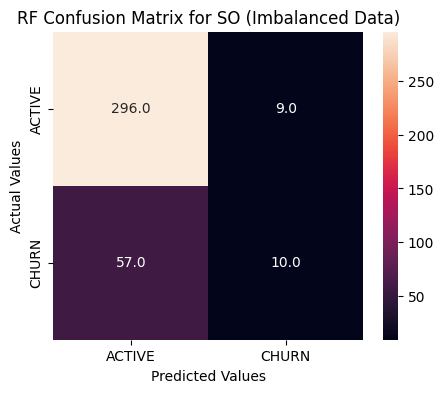

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf_df, annot=True, fmt=".1f")
plt.title('RF Confusion Matrix for SO (Imbalanced Data)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Compute prediction probablitities
rf_prob = model_rf_scaled.predict_proba(x2_test)
rf_prob = rf_prob[:,1]

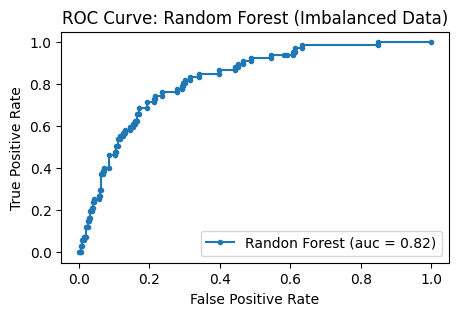

In [ ]:
# Calculate ROC curve and AUC using the binary labels
rf_fpr, rf_tpr, threshold = roc_curve(y2_test, rf_prob)
auc_rf = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(5, 3), dpi=100)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Randon Forest (auc = %0.2f)' % auc_rf)

# Set the plot title
plt.title('ROC Curve: Random Forest (Imbalanced Data)')

# Set the axes labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# **Logistic Regression Classifier on Imbalanced Dataset...**

In [ ]:
# Define the lists of hyperparameters to iterate over
C_list = [1, 10, 20]
penalty_list = ['l2', 'none']

# Create an empty array to store the tuning results
LRG_imb_results = np.zeros((len(C_list) * len(penalty_list), 3), dtype=object)  # Specify dtype as object to store strings

index = 0

# Loop through each combination of hyperparameters
for C in C_list:
    for penalty in penalty_list:
        # Create a Logistic Regression model with the current hyperparameters
        model_lr = LogisticRegression(max_iter=200, C=C, penalty=penalty)

        # Train the model on the training data
        model_lr.fit(x2_train, y2_train)

        # Make predictions on the test data
        predictions = model_lr.predict(x2_test)

        # Calculate accuracy score
        accuracy = accuracy_score(y2_test, predictions)

        # Store the hyperparameters and accuracy in the tuning_results array
        LRG_imb_results[index] = [str(C), penalty, accuracy]  # Convert C to string
        index += 1

# Create a DataFrame from the tuning_results array
col_names = ['C', 'Penalty', 'Accuracy']
LRG_imb_results_df = pd.DataFrame(LRG_imb_results, columns=col_names)
LRG_imb_results_df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C an

C Penalty  Accuracy
0   1      l2  0.825269
1   1    none  0.819892
2  10      l2  0.819892
3  10    none  0.819892
4  20      l2  0.817204
5  20    none  0.819892

In [ ]:
LRG_imb_results_df[LRG_imb_results_df['Accuracy'] == LRG_imb_results_df['Accuracy'].max()]

C Penalty  Accuracy
0  1      l2  0.825269

In [ ]:
model_lrg_scaled = LogisticRegression(C=1, penalty='l2')
model_lrg_scaled.fit(x2_train, y2_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

In [ ]:
y2_pred_lrg_scaled = model_lrg_scaled.predict(x2_test)
lrg_score_scaled = model_lrg_scaled.score(x2_test, y2_test)
print(f"Training Time: {training_time:.4f} seconds")
print(lrg_score_scaled)
print(metrics.classification_report(y2_test, y2_pred_lrg_scaled))

Training Time: 1.3190 seconds
0.8252688172043011
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90       305
         1.0       0.62      0.07      0.13        67

    accuracy                           0.83       372
   macro avg       0.73      0.53      0.52       372
weighted avg       0.79      0.83      0.76       372



In [ ]:
cm_lrg = confusion_matrix(y2_test, y2_pred_lrg_scaled)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_lrg_df = pd.DataFrame(cm_lrg,
                     index = ['ACTIVE','CHURN'],
                     columns = ['ACTIVE','CHURN'])
cm_lrg_df

ACTIVE  CHURN
ACTIVE     302      3
CHURN       62      5

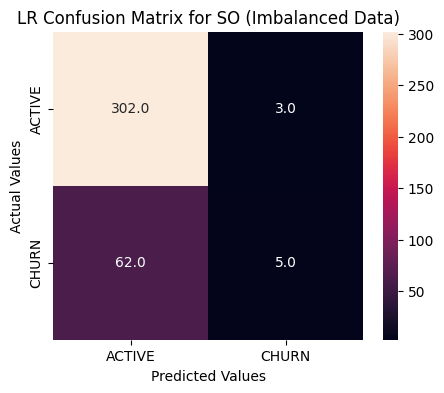

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_lrg_df, annot=True, fmt=".1f")
plt.title('LR Confusion Matrix for SO (Imbalanced Data)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Compute prediction probablitities
lrg_prob = model_lrg_scaled.predict_proba(x2_test)
lrg_prob = lrg_prob[:,1]

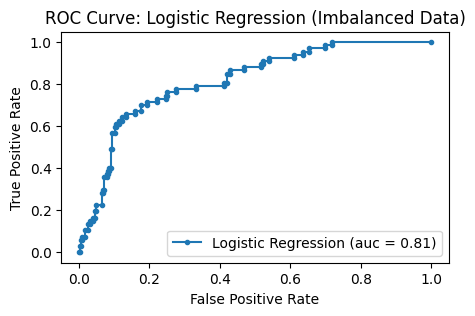

In [ ]:
# Calculate ROC curve and AUC using the binary labels
lrg_fpr, lrg_tpr, threshold = roc_curve(y2_test, lrg_prob)
auc_lrg = auc(lrg_fpr, lrg_tpr)

plt.figure(figsize=(5, 3), dpi=100)
plt.plot(lrg_fpr, lrg_tpr, marker='.',
         label='Logistic Regression (auc = %0.2f)' % auc_lrg)

# Set the plot title
plt.title('ROC Curve: Logistic Regression (Imbalanced Data)')

# Set the axes labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# **Support Vector Classifier on Imbalanced Dataset**

In [ ]:
# Manually iterate through different depths and leaf to get that with the optimum accuracy
# Define the lists of hyperparameters to iterate over
C_list = [1, 10, 20]
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

# Create an empty array to store the tuning results
SVM_imb_results = np.zeros((len(C_list) * len(kernel_list), 3), dtype=object)  # Specify dtype as object to store strings

index = 0

# Loop through each combination of hyperparameters
for C in C_list:
    for kernel in kernel_list:
        # Create an SVC model with the current hyperparameters
        model_svc = SVC(C=C, kernel=kernel)

        # Train the model on the training data
        model_svc.fit(x2_train, y2_train)

        # Make predictions on the test data
        predictions = model_svc.predict(x2_test)

        # Calculate accuracy score
        accuracy = accuracy_score(y2_test, predictions)

        # Store the hyperparameters and accuracy in the tuning_results array
        SVM_imb_results[index] = [str(C), kernel, accuracy]  # Convert C to string
        index += 1

# Create a DataFrame from the tuning_results array
col_names = ['C', 'Kernel', 'Accuracy']
SVM_imb_results_df = pd.DataFrame(SVM_imb_results, columns=col_names)
SVM_imb_results_df

C   Kernel  Accuracy
0    1   linear  0.819892
1    1     poly  0.819892
2    1      rbf  0.819892
3    1  sigmoid  0.793011
4   10   linear  0.819892
5   10     poly  0.814516
6   10      rbf  0.814516
7   10  sigmoid  0.747312
8   20   linear  0.819892
9   20     poly  0.806452
10  20      rbf  0.806452
11  20  sigmoid  0.747312

In [ ]:
SVM_imb_results_df[SVM_imb_results_df['Accuracy'] == SVM_imb_results_df['Accuracy'].max()]

C  Kernel  Accuracy
0   1  linear  0.819892
1   1    poly  0.819892
2   1     rbf  0.819892
4  10  linear  0.819892
8  20  linear  0.819892

In [ ]:
model_svc_scaled = SVC(probability=True)

# Measure the training time
start_time = time.time()
model_svc_scaled.fit(x2_train, y2_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

In [ ]:
y2_pred_svc_scaled = model_svc_scaled.predict(x2_test)
svc_score_scaled = model_svc_scaled.score(x2_test, y2_test)
print(f"Training Time: {training_time:.4f} seconds")
print(svc_score_scaled)
print(metrics.classification_report(y2_test, y2_pred_svc_scaled))

Training Time: 0.2154 seconds
0.8198924731182796
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       305
         1.0       0.00      0.00      0.00        67

    accuracy                           0.82       372
   macro avg       0.41      0.50      0.45       372
weighted avg       0.67      0.82      0.74       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm_svc = confusion_matrix(y2_test, y2_pred_svc_scaled)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_svc_df = pd.DataFrame(cm_svc,
                     index = ['ACTIVE','CHURN'],
                     columns = ['ACTIVE','CHURN'])
cm_svc_df

ACTIVE  CHURN
ACTIVE     305      0
CHURN       67      0

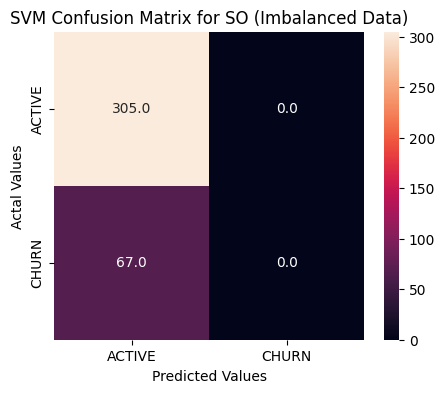

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_svc_df, annot=True, fmt=".1f")
plt.title('SVM Confusion Matrix for SO (Imbalanced Data)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Compute prediction probablitities
svc_prob = model_svc_scaled.predict_proba(x2_test)
svc_prob = svc_prob[:,1]

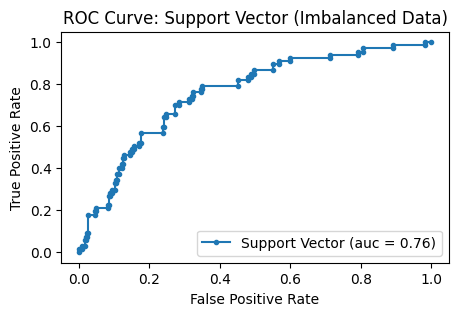

In [ ]:
# Calculate ROC curve and AUC using the binary labels
svc_fpr, svc_tpr, threshold = roc_curve(y2_test, svc_prob)
auc_svc = auc(svc_fpr, svc_tpr)

plt.figure(figsize=(5, 3), dpi=100)
plt.plot(svc_fpr, svc_tpr, marker='.',
         label='Support Vector (auc = %0.2f)' % auc_svc)

# Set the plot title
plt.title('ROC Curve: Support Vector (Imbalanced Data)')

# Set the axes labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# **Artificial Neural Network Classifier on Imbalanced Dataset:**

In [ ]:
import tensorflow as tf
from tensorflow import keras


ann_model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(28,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
#    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

ann_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Measure the training time
start_time = time.time()
history = ann_model.fit(x2_train, y2_train, validation_data=(x2_test, y2_test),
                    epochs=30)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time


Epoch 1/30
28/28 [==============================] - 1s 13ms/step - loss: 0.6097 - accuracy: 0.7691 - val_loss: 0.5444 - val_accuracy: 0.8172
Epoch 2/30
28/28 [==============================] - 0s 4ms/step - loss: 0.4913 - accuracy: 0.8210 - val_loss: 0.4644 - val_accuracy: 0.8199
Epoch 3/30
28/28 [==============================] - 0s 4ms/step - loss: 0.4428 - accuracy: 0.8199 - val_loss: 0.4464 - val_accuracy: 0.8199
Epoch 4/30
28/28 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.8199 - val_loss: 0.4377 - val_accuracy: 0.8199
Epoch 5/30
28/28 [==============================] - 0s 6ms/step - loss: 0.4228 - accuracy: 0.8199 - val_loss: 0.4312 - val_accuracy: 0.8199
Epoch 6/30
28/28 [==============================] - 0s 4ms/step - loss: 0.4157 - accuracy: 0.8199 - val_loss: 0.4243 - val_accuracy: 0.8199
Epoch 7/30
28/28 [==============================] - 0s 6ms/step - loss: 0.4085 - accuracy: 0.8199 - val_loss: 0.4181 - val_accuracy: 0.8199
Epoch 8/30
28/28 [=

In [ ]:
ann_model.evaluate(x2_test, y2_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8253


[0.3697216212749481, 0.8252688050270081]

In [ ]:
y2_pred = ann_model.predict(x2_test)
y_pred_ann_scaled = []
for element in y2_pred:
    if element > 0.5:
        y_pred_ann_scaled.append(1)
    else:
        y_pred_ann_scaled.append(0)

12/12 [==============================] - 0s 2ms/step


In [ ]:
# Print the model training time
print(f"Training Time: {training_time:.4f} seconds")
print(metrics.classification_report(y2_test, y_pred_ann_scaled))

Training Time: 6.2503 seconds
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90       305
         1.0       0.56      0.13      0.22        67

    accuracy                           0.83       372
   macro avg       0.70      0.56      0.56       372
weighted avg       0.79      0.83      0.78       372



In [ ]:
cm_ann = confusion_matrix(y2_test, y_pred_ann_scaled)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_ann_df = pd.DataFrame(cm_ann,
                     index = ['ACTIVE','CHURN'],
                     columns = ['ACTIVE','CHURN'])
cm_ann_df

ACTIVE  CHURN
ACTIVE     298      7
CHURN       58      9

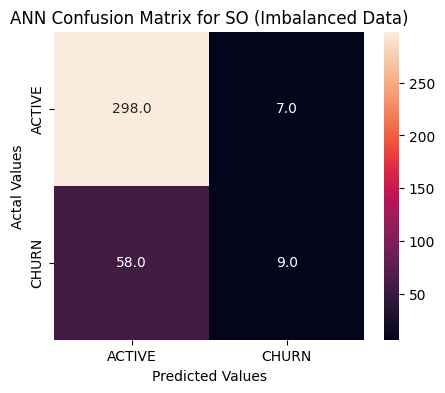

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_ann_df, annot=True, fmt='.1f')
plt.title('ANN Confusion Matrix for SO (Imbalanced Data)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

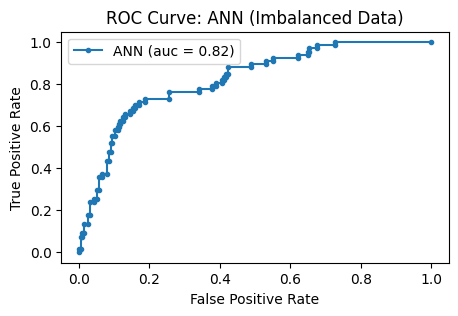

In [ ]:
# Calculate ROC curve and AUC using the binary labels
ann_model_fpr, ann_model_tpr, threshold = roc_curve(y2_test, y2_pred)
auc_ann_model = auc(ann_model_fpr, ann_model_tpr)

plt.figure(figsize=(5, 3), dpi=100)
plt.plot(ann_model_fpr, ann_model_tpr, marker='.',
         label='ANN (auc = %0.2f)' % auc_ann_model)

# Set the plot title
plt.title('ROC Curve: ANN (Imbalanced Data)')

# Set the axes labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# **XGBoost Classifier on Imbalanced Dataset:**

In [ ]:
model_xgb_scaled = xgb.XGBClassifier()

# Measure the training time
start_time = time.time()
model_xgb_scaled.fit(x2_train, y2_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

In [ ]:
y2_pred_xgb_scaled = model_xgb_scaled.predict(x2_test)
xgb_score_scaled = model_xgb_scaled.score(x2_test, y2_test)
print(f"Training Time: {training_time:.4f} seconds")
print(xgb_score_scaled)
print(metrics.classification_report(y2_test, y2_pred_xgb_scaled))

Training Time: 2.6306 seconds
0.8198924731182796
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       305
         1.0       0.50      0.39      0.44        67

    accuracy                           0.82       372
   macro avg       0.69      0.65      0.66       372
weighted avg       0.80      0.82      0.81       372



In [ ]:
cm_xgb = confusion_matrix(y2_test, y2_pred_xgb_scaled)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_xgb_df = pd.DataFrame(cm_xgb,
                     index = ['ACTIVE','CHURN'],
                     columns = ['ACTIVE','CHURN'])
cm_xgb_df

ACTIVE  CHURN
ACTIVE     279     26
CHURN       41     26

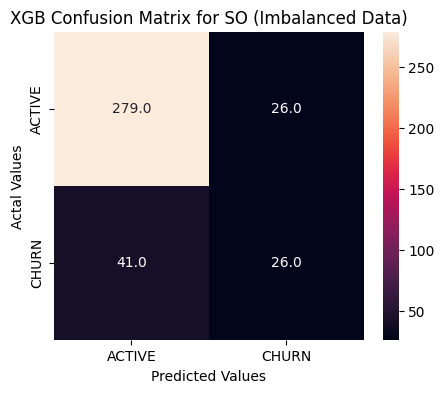

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb_df, annot=True, fmt='.1f')
plt.title('XGB Confusion Matrix for SO (Imbalanced Data)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Compute prediction probablitities
xgb_prob = model_xgb_scaled.predict_proba(x2_test)
xgb_prob = xgb_prob[:,1]

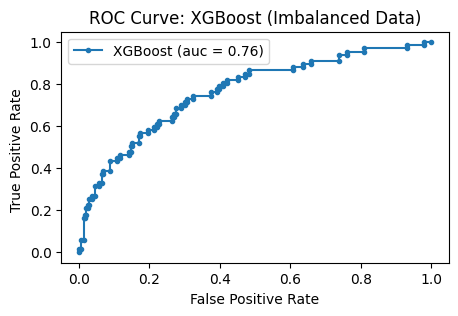

In [ ]:
# Calculate ROC curve and AUC using the binary labels
xgb_fpr, xgb_tpr, threshold = roc_curve(y2_test, xgb_prob)
auc_xgb = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(5, 3), dpi=100)
plt.plot(xgb_fpr, xgb_tpr, marker='.',
         label='XGBoost (auc = %0.2f)' % auc_xgb)

# Set the plot title
plt.title('ROC Curve: XGBoost (Imbalanced Data)')

# Set the axes labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')

plt.legend()

plt.show()

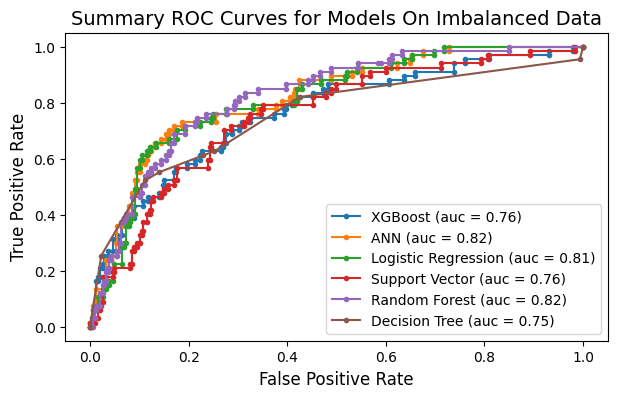

In [ ]:
plt.figure(figsize=(7, 4), dpi=100)

# Plotting ROC curves for different models
plt.plot(xgb_fpr, xgb_tpr, marker='.',
         label='XGBoost (auc = %0.2f)' % auc_xgb)
plt.plot(ann_model_fpr, ann_model_tpr, marker='.',
         label='ANN (auc = %0.2f)' % auc_ann_model)
plt.plot(lrg_fpr, lrg_tpr, marker='.',
         label='Logistic Regression (auc = %0.2f)' % auc_lrg)
plt.plot(svc_fpr, svc_tpr, marker='.',
         label='Support Vector (auc = %0.2f)' % auc_svc)
plt.plot(rf_fpr, rf_tpr, marker='.',
         label='Random Forest (auc = %0.2f)' % auc_rf)
plt.plot(dt_fpr, dt_tpr, marker='.',
         label='Decision Tree (auc = %0.2f)' % auc_dt)

plt.xlabel('False Positive Rate', size=12)
plt.ylabel('True Positive Rate', size=12)
plt.title('Summary ROC Curves for Models On Imbalanced Data', size=14)

plt.legend()

plt.show()

# OPTION 2: Using the Balanced Dataset...

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
x_resampled, y_resampled = sm.fit_resample(x2_train, y2_train)

In [ ]:
# Check the distribution of the target classes within the resampled dataset
y_resampled.value_counts()

0.0    710
1.0    710
Name: Status, dtype: int64

In [ ]:
# Split the resampled data into training and testing sets
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.3)

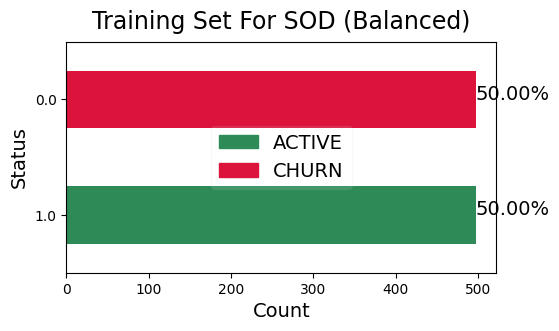

In [ ]:
# Compute the value counts of the target variable
target_var = yr_train.value_counts()

# Set the figure size
plt.figure(figsize=(4, 3))

# Define the colors for the bars and legend
bar_colors = ['seagreen', 'crimson']
legend_colors = bar_colors[:len(target_var)]

# Plot the count plot with different bar colors
plt.subplots_adjust(right=1.2)
ax = target_var.plot(kind='barh', color=bar_colors)
plt.xlabel("Count", size=14)
plt.ylabel("Status", size=14)

# Add percentage count labels to each bar
total = target_var.sum()
for i, count in enumerate(target_var):
    percentage = f'{(count / total) * 100:.2f}%'
    ax.text(count, i, f"{percentage}", size=14)

# Create custom legend
legend_labels = ['ACTIVE', 'CHURN']
legend_patches = [mpatches.Patch(color=color, label=label) for color,
                  label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_patches, loc='center', fontsize=14, framealpha=0.1)

plt.title("Training Set For SOD (Balanced)", y=1.02, size=17)
# Display the plot
plt.show()

# **Decision Tree Classifier on Balanced Dataset...**

In [ ]:
#iterate through different depths and leaf to get that with the optimum accuracy
depth_list = list(range(1, 15))
leaf_list = list(range(1, 10))
DT_bal_results = np.zeros((len(depth_list) * len(leaf_list), 3))
index = 0

for depth in depth_list:
    for leaf in leaf_list:
        model_dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf)
        model_dt.fit(xr_train, yr_train)
        predictions = model_dt.predict(xr_test)
        accuracy = accuracy_score(yr_test, predictions)
        DT_bal_results[index] = [depth, leaf, accuracy]
        index += 1

col_names = ['Max_Depth', 'Min_Samples_Leaf', 'Accuracy']
DT_bal_df = pd.DataFrame(DT_bal_results, columns=col_names)
DT_bal_df

Max_Depth  Min_Samples_Leaf  Accuracy
0          1.0               1.0  0.769953
1          1.0               2.0  0.769953
2          1.0               3.0  0.769953
3          1.0               4.0  0.769953
4          1.0               5.0  0.769953
..         ...               ...       ...
121       14.0               5.0  0.798122
122       14.0               6.0  0.802817
123       14.0               7.0  0.793427
124       14.0               8.0  0.791080
125       14.0               9.0  0.795775

[126 rows x 3 columns]

In [ ]:
#max_accuracy = tuning_df['Accuracy'].max()
DT_bal_df[DT_bal_df['Accuracy'] == DT_bal_df['Accuracy'].max()]
#print(best_results)

Max_Depth  Min_Samples_Leaf  Accuracy
90       11.0               1.0  0.838028

In [ ]:

model_dt_upsampled = DecisionTreeClassifier(criterion="gini", max_depth=7, min_samples_leaf=2)

# Measure the training time
start_time = time.time()
model_dt_upsampled.fit(xr_train, yr_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

In [ ]:
y_pred_dt_upsampled = model_dt_upsampled.predict(xr_test)
dt_score_scaled = model_dt_upsampled.score(xr_test,yr_test)
# Print the model training time
print(f"Training Time: {training_time:.4f} seconds")
print(dt_score_scaled)
print(classification_report(yr_test, y_pred_dt_upsampled, labels=[0,1]))

Training Time: 0.0083 seconds
0.8145539906103286
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       213
           1       0.78      0.88      0.83       213

    accuracy                           0.81       426
   macro avg       0.82      0.81      0.81       426
weighted avg       0.82      0.81      0.81       426



In [ ]:
#DECISION TREE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

cm_dt_upsampled = confusion_matrix(yr_test, y_pred_dt_upsampled)
cm_dt_upsampled

array([[159,  54],
       [ 25, 188]])

In [ ]:
cm_dt = confusion_matrix(yr_test, y_pred_dt_upsampled)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_dt_df = pd.DataFrame(cm_dt_upsampled,
                     index = ['ACTIVE','CHURN'],
                     columns = ['ACTIVE','CHURN'])
cm_dt_df

ACTIVE  CHURN
ACTIVE     159     54
CHURN       25    188

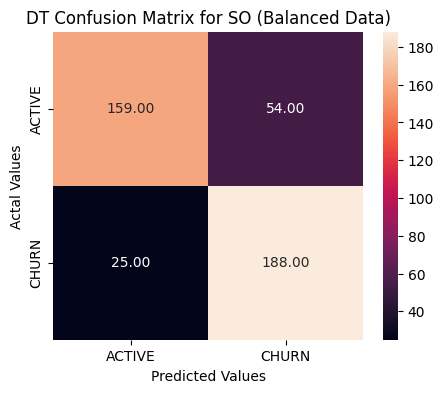

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt_df, annot=True, fmt='.2f')
plt.title('DT Confusion Matrix for SO (Balanced Data)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Compute prediction probablitities
ups_dt_prob = model_dt_upsampled.predict_proba(xr_test)
ups_dt_prob = ups_dt_prob[:,1]

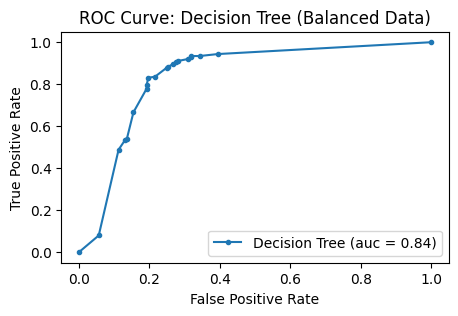

In [ ]:
# Calculate ROC curve and AUC using the binary labels
upsdt_fpr, upsdt_tpr, threshold = roc_curve(yr_test, ups_dt_prob)
auc_upsdt = auc(upsdt_fpr, upsdt_tpr)

plt.figure(figsize=(5, 3), dpi=100)
plt.plot(upsdt_fpr, upsdt_tpr, marker='.',
         label='Decision Tree (auc = %0.2f)' % auc_upsdt)

# Set the plot title
plt.title('ROC Curve: Decision Tree (Balanced Data)')

# Set the axes labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# **Random Forest Classifier On Balanced Dataset**

In [ ]:
# Manually iterate through different depths and leaf to get that with the optimum accuracy
depth_list = list(range(1, 15))
leaf_list = list(range(1, 10))
RF_bal_results = np.zeros((len(depth_list) * len(leaf_list), 3))
index = 0

for depth in depth_list:
    for leaf in leaf_list:
        model_dt = RandomForestClassifier(max_depth=depth, min_samples_leaf=leaf)
        model_dt.fit(xr_train, yr_train)
        predictions = model_dt.predict(xr_test)
        accuracy = accuracy_score(yr_test, predictions)
        RF_bal_results[index] = [depth, leaf, accuracy]
        index += 1

col_names = ['Max_Depth', 'Min_Samples_Leaf', 'Accuracy']
RF_bal_df = pd.DataFrame(RF_bal_results, columns=col_names)
RF_bal_df

Max_Depth  Min_Samples_Leaf  Accuracy
0          1.0               1.0  0.795775
1          1.0               2.0  0.793427
2          1.0               3.0  0.769953
3          1.0               4.0  0.793427
4          1.0               5.0  0.786385
..         ...               ...       ...
121       14.0               5.0  0.830986
122       14.0               6.0  0.826291
123       14.0               7.0  0.814554
124       14.0               8.0  0.821596
125       14.0               9.0  0.807512

[126 rows x 3 columns]

In [ ]:
RF_bal_df[RF_bal_df['Accuracy'] == RF_bal_df['Accuracy'].max()]

Max_Depth  Min_Samples_Leaf  Accuracy
117       14.0               1.0  0.884977

In [ ]:
model_rf_upsampled = RandomForestClassifier(max_depth=14, min_samples_leaf=1)

# Measure the training time
start_time = time.time()
model_rf_upsampled.fit(xr_train,yr_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

In [ ]:
y_pred_rf_scaled = model_rf_upsampled.predict(xr_test)
rf_score_scaled = model_rf_upsampled.score(xr_test,yr_test)
# Print the model training time
print(f"Training Time: {training_time:.4f} seconds")
print(rf_score_scaled)
print(metrics.classification_report(yr_test, y_pred_rf_scaled))

Training Time: 0.2680 seconds
0.8873239436619719
              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88       213
         1.0       0.85      0.94      0.89       213

    accuracy                           0.89       426
   macro avg       0.89      0.89      0.89       426
weighted avg       0.89      0.89      0.89       426



In [ ]:
cm_rf = confusion_matrix(yr_test, y_pred_rf_scaled)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_rf_df = pd.DataFrame(cm_rf,
                     index = ['ACTIVE','CHURN'],
                     columns = ['ACTIVE','CHURN'])
cm_rf_df

ACTIVE  CHURN
ACTIVE     178     35
CHURN       13    200

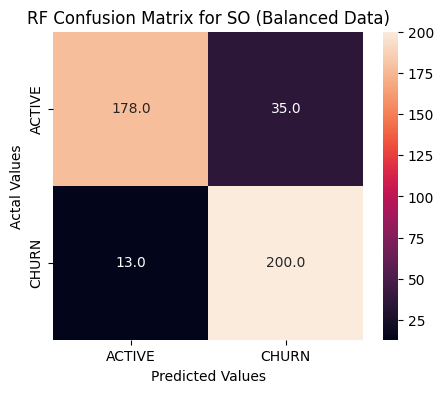

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf_df, annot=True, fmt='.1f')
plt.title('RF Confusion Matrix for SO (Balanced Data)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Compute prediction probablitities
ups_rf_prob = model_rf_upsampled.predict_proba(xr_test)
ups_rf_prob = ups_rf_prob[:,1]

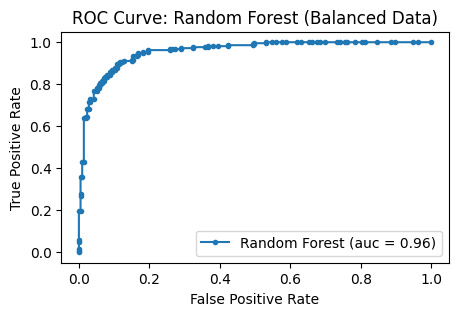

In [ ]:
# Calculate ROC curve and AUC using the binary labels
upsrf_fpr, upsrf_tpr, threshold = roc_curve(yr_test, ups_rf_prob)
auc_upsrf = auc(upsrf_fpr, upsrf_tpr)

plt.figure(figsize=(5, 3), dpi=100)
plt.plot(upsrf_fpr, upsrf_tpr, marker='.',
         label='Random Forest (auc = %0.2f)' % auc_upsrf)

# Set the plot title
plt.title('ROC Curve: Random Forest (Balanced Data)')

# Set the axes labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# **Support Vector Classifier on Balanced Dataset...**

In [ ]:
# Manually iterate through different depths and leaf to get that with the optimum accuracy
# Define the lists of hyperparameters to iterate over
C_list = [1, 10, 20]
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

# Create an empty array to store the tuning results
SVM_bal_results = np.zeros((len(C_list) * len(kernel_list), 3), dtype=object)  # Specify dtype as object to store strings

index = 0

# Loop through each combination of hyperparameters
for C in C_list:
    for kernel in kernel_list:
        # Create an SVC model with the current hyperparameters
        model_svc = SVC(C=C, kernel=kernel)

        # Train the model on the training data
        model_svc.fit(xr_train, yr_train)

        # Make predictions on the test data
        predictions = model_svc.predict(xr_test)

        # Calculate accuracy score
        accuracy = accuracy_score(yr_test, predictions)

        # Store the hyperparameters and accuracy in the tuning_results array
        SVM_bal_results[index] = [str(C), kernel, accuracy]  # Convert C to string
        index += 1

# Create a DataFrame from the tuning_results array
col_names = ['C', 'Kernel', 'Accuracy']
SVM_bal_df = pd.DataFrame(SVM_bal_results, columns=col_names)
SVM_bal_df


C   Kernel  Accuracy
0    1   linear   0.78169
1    1     poly   0.79108
2    1      rbf  0.784038
3    1  sigmoid  0.664319
4   10   linear  0.779343
5   10     poly  0.807512
6   10      rbf  0.795775
7   10  sigmoid  0.626761
8   20   linear   0.78169
9   20     poly  0.812207
10  20      rbf  0.816901
11  20  sigmoid  0.615023

In [ ]:
SVM_bal_df[SVM_bal_df['Accuracy'] == SVM_bal_df['Accuracy'].max()]

C Kernel  Accuracy
10  20    rbf  0.816901

In [ ]:
model_svc_upsampled = SVC(C=20, kernel='poly', gamma='scale', probability=True)

# Measure the training time
start_time = time.time()
model_svc_upsampled.fit(xr_train, yr_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

In [ ]:
y_pred_svc_upsampled = model_svc_upsampled.predict(xr_test)
svc_upsampled_score = model_svc_upsampled.score(xr_test, yr_test)

# Print the model training time
print(f"Training Time: {training_time:.4f} seconds")
print(svc_upsampled_score)
print(metrics.classification_report(yr_test, y_pred_svc_upsampled))

Training Time: 0.1976 seconds
0.812206572769953
              precision    recall  f1-score   support

         0.0       0.87      0.74      0.80       213
         1.0       0.77      0.89      0.83       213

    accuracy                           0.81       426
   macro avg       0.82      0.81      0.81       426
weighted avg       0.82      0.81      0.81       426



In [ ]:
# SUPPORT VECTOR CONFUSION MATRIX
cm_svc = confusion_matrix(yr_test, y_pred_svc_upsampled)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_svc_df = pd.DataFrame(cm_svc,
                     index = ['ACTIVE','CHURN'],
                     columns = ['ACTIVE','CHURN'])
cm_svc_df

ACTIVE  CHURN
ACTIVE     157     56
CHURN       24    189

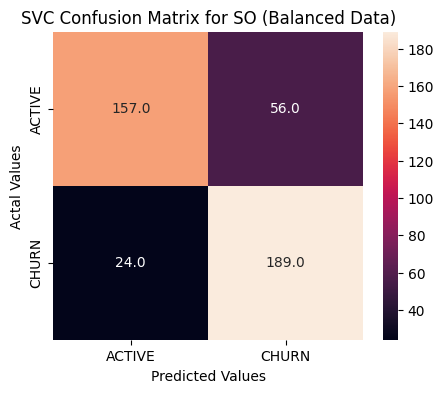

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_svc_df, annot=True, fmt='.1f')
plt.title('SVC Confusion Matrix for SO (Balanced Data)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Compute prediction probablitities
ups_svc_prob = model_svc_upsampled.predict_proba(xr_test)
ups_svc_prob = ups_svc_prob[:,1]

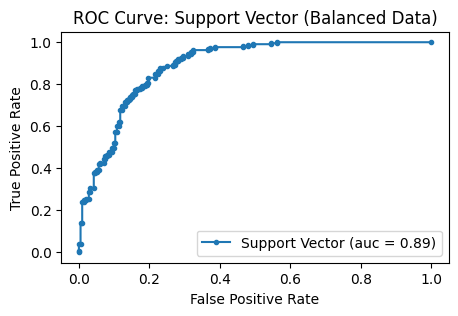

In [ ]:
# Calculate ROC curve and AUC using the binary labels
ups_svc_fpr, ups_svc_tpr, threshold = roc_curve(yr_test, ups_svc_prob)
auc_ups_svc = auc(ups_svc_fpr, ups_svc_tpr)

plt.figure(figsize=(5, 3), dpi=100)
plt.plot(ups_svc_fpr, ups_svc_tpr, marker='.',
         label='Support Vector (auc = %0.2f)' % auc_ups_svc)

# Set the plot title
plt.title('ROC Curve: Support Vector (Balanced Data)')

# Set the axes labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# **Logistic Regression Classifier on Balanced Dataset...**

In [ ]:
# Define the lists of hyperparameters to iterate over
C_list = [1, 10, 20]
penalty_list = ['l2', 'none']

# Create an empty array to store the tuning results
LR_bal_results = np.zeros((len(C_list) * len(penalty_list), 3), dtype=object)  # Specify dtype as object to store strings

index = 0

# Loop through each combination of hyperparameters
for C in C_list:
    for penalty in penalty_list:
        # Create a Logistic Regression model with the current hyperparameters
        model_lr = LogisticRegression(max_iter=200, C=C, penalty=penalty)

        # Train the model on the training data
        model_lr.fit(xr_train, yr_train)

        # Make predictions on the test data
        predictions = model_lr.predict(xr_test)

        # Calculate accuracy score
        accuracy = accuracy_score(yr_test, predictions)

        # Store the hyperparameters and accuracy in the tuning_results array
        LR_bal_results[index] = [str(C), penalty, accuracy]  # Convert C to string
        index += 1

# Create a DataFrame from the tuning_results array
col_names = ['C', 'Penalty', 'Accuracy']
LR_bal_df = pd.DataFrame(LR_bal_results, columns=col_names)
LR_bal_df


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/d

C Penalty  Accuracy
0   1      l2   0.78169
1   1    none  0.774648
2  10      l2  0.774648
3  10    none  0.774648
4  20      l2  0.779343
5  20    none  0.774648

In [ ]:
LR_bal_df[LR_bal_df['Accuracy'] == LR_bal_df['Accuracy'].max()]

C Penalty Accuracy
0  1      l2  0.78169

In [ ]:
# Create a Logistic Regression model with the specified hyperparameters
model_lrg_upsampled = LogisticRegression(C=10, penalty='l2', max_iter=1000, solver='lbfgs')

# Measure the training time
start_time = time.time()
# Train the Logistic Regression model on the upsampled training data
model_lrg_upsampled.fit(xr_train, yr_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time


In [ ]:
# Predict the target labels using the trained Logistic Regression model on the test data
y_pred_lrg_upsampled = model_lrg_upsampled.predict(xr_test)

# Calculate the accuracy score of the Logistic Regression model on the test data
lrg_score_upsampled = model_lrg_upsampled.score(xr_test, yr_test)

# Print the model training time
print(f"Training Time: {training_time:.4f} seconds")

# Print the accuracy score
print(lrg_score_upsampled)

# Print the classification report showing precision, recall, and F1-score for each class
print(metrics.classification_report(yr_test, y_pred_lrg_upsampled))

Training Time: 0.0495 seconds
0.7746478873239436
              precision    recall  f1-score   support

         0.0       0.83      0.69      0.76       213
         1.0       0.74      0.85      0.79       213

    accuracy                           0.77       426
   macro avg       0.78      0.77      0.77       426
weighted avg       0.78      0.77      0.77       426



In [ ]:
cm_lrg_upsampled = confusion_matrix(yr_test, y_pred_lrg_upsampled)
cm_lrg_upsampled

array([[148,  65],
       [ 31, 182]])

In [ ]:
# LOGISTIC REGRESSION MATRIX
cm_lrg_upsampled = confusion_matrix(yr_test, y_pred_lrg_upsampled)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_lrg_upsampled_df = pd.DataFrame(cm_lrg_upsampled,
                     index = ['ACTIVE','CHURN'],
                     columns = ['ACTIVE','CHURN'])
cm_lrg_upsampled_df

ACTIVE  CHURN
ACTIVE     148     65
CHURN       31    182

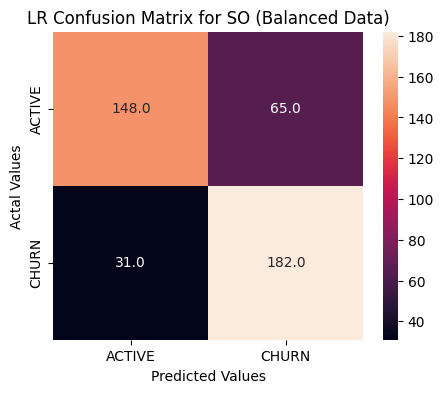

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_lrg_upsampled_df, annot=True, fmt='.1f')
plt.title('LR Confusion Matrix for SO (Balanced Data)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Compute prediction probablitities
ups_lrg_prob = model_lrg_upsampled.predict_proba(xr_test)
ups_lrg_prob = ups_lrg_prob[:,1]

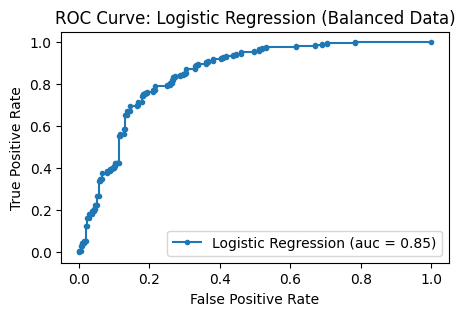

In [ ]:
# Calculate ROC curve and AUC using the binary labels
ups_lrg_fpr, ups_lrg_tpr, threshold = roc_curve(yr_test, ups_lrg_prob)
auc_ups_lrg = auc(ups_lrg_fpr, ups_lrg_tpr)

plt.figure(figsize=(5, 3), dpi=100)
plt.plot(ups_lrg_fpr, ups_lrg_tpr, marker='.',
         label='Logistic Regression (auc = %0.2f)' % auc_ups_lrg)

# Set the plot title
plt.title('ROC Curve: Logistic Regression (Balanced Data)')

# Set the axes labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# **ANN Classifier on Balanced Dataset...**

In [ ]:
model_upsampled = keras.Sequential([
    keras.layers.Dense(15, input_shape=(28,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
#    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_upsampled.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Measure the training time
start_time = time.time()
history = model_upsampled.fit(xr_train, yr_train, validation_data=(xr_test, yr_test),
                    epochs=30)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time


Epoch 1/30
32/32 [==============================] - 1s 9ms/step - loss: 0.7428 - accuracy: 0.5000 - val_loss: 0.7026 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.5000 - val_loss: 0.6616 - val_accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 0.6430 - accuracy: 0.5855 - val_loss: 0.6283 - val_accuracy: 0.6127
Epoch 4/30
32/32 [==============================] - 0s 4ms/step - loss: 0.6109 - accuracy: 0.6549 - val_loss: 0.5999 - val_accuracy: 0.6643
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5842 - accuracy: 0.6952 - val_loss: 0.5734 - val_accuracy: 0.7113
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5607 - accuracy: 0.7404 - val_loss: 0.5527 - val_accuracy: 0.7606
Epoch 7/30
32/32 [==============================] - 0s 6ms/step - loss: 0.5380 - accuracy: 0.7616 - val_loss: 0.5349 - val_accuracy: 0.7488
Epoch 8/30
32/32 [==

In [ ]:
model_upsampled.evaluate(xr_test, yr_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7746


[0.4721217751502991, 0.7746478915214539]

In [ ]:
yr_pred_ups = model_upsampled.predict(xr_test)
yr_pred_ann_ups = []
for element in yr_pred_ups:
    if element > 0.5:
        yr_pred_ann_ups.append(1)
    else:
        yr_pred_ann_ups.append(0)

14/14 [==============================] - 0s 1ms/step


In [ ]:
# Print the model training time
print(f"Training Time: {training_time:.4f} seconds")

print(metrics.classification_report(yr_test, yr_pred_ann_ups))

Training Time: 6.3014 seconds
              precision    recall  f1-score   support

         0.0       0.85      0.66      0.75       213
         1.0       0.72      0.89      0.80       213

    accuracy                           0.77       426
   macro avg       0.79      0.77      0.77       426
weighted avg       0.79      0.77      0.77       426



In [ ]:
cm_ann_upsampled = confusion_matrix(yr_test, yr_pred_ann_ups)
cm_ann_upsampled

array([[141,  72],
       [ 24, 189]])

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_ann_upsampled_df = pd.DataFrame(cm_ann_upsampled,
                     index = ['ACTIVE','CHURN'],
                     columns = ['ACTIVE','CHURN'])
cm_ann_upsampled_df

ACTIVE  CHURN
ACTIVE     141     72
CHURN       24    189

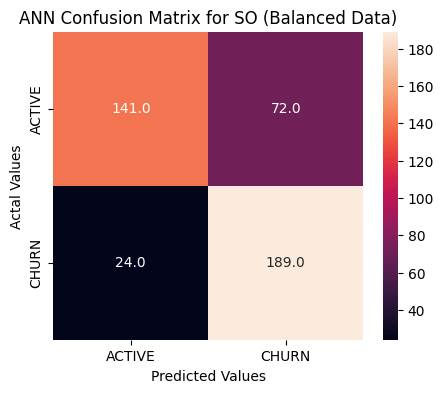

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_ann_upsampled_df, annot=True, fmt='.1f')
plt.title('ANN Confusion Matrix for SO (Balanced Data)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

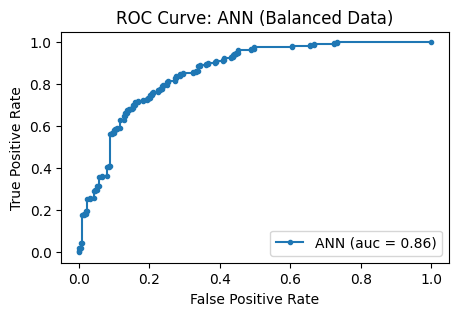

In [ ]:
# Calculate ROC curve and AUC using the binary labels
ann_upsampled_fpr, ann_upsampled_tpr, threshold = roc_curve(yr_test, yr_pred_ups)
auc_ann_upsampled = auc(ann_upsampled_fpr, ann_upsampled_tpr)

plt.figure(figsize=(5, 3), dpi=100)
plt.plot(ann_upsampled_fpr, ann_upsampled_tpr, marker='.',
         label='ANN (auc = %0.2f)' % auc_ann_upsampled)

# Set the plot title
plt.title('ROC Curve: ANN (Balanced Data)')

# Set the axes labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# **XGBoost Classifier on Balanced Dataset...**

In [ ]:
model_xgb_upsampled = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=200)
# Measure the training time
start_time = time.time()
model_xgb_upsampled.fit(xr_train, yr_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

In [ ]:
y_pred_xgb_upsampled = model_xgb_upsampled.predict(xr_test)
xgb_upsampled_score = model_xgb_upsampled.score(xr_test, yr_test)
print(xgb_upsampled_score)
print(f"Training Time: {training_time:.4f} seconds")
print(metrics.classification_report(yr_test, y_pred_xgb_upsampled))

0.8615023474178404
Training Time: 0.3699 seconds
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       213
         1.0       0.85      0.88      0.86       213

    accuracy                           0.86       426
   macro avg       0.86      0.86      0.86       426
weighted avg       0.86      0.86      0.86       426



In [ ]:
cm_xgb_upsampled = confusion_matrix(yr_test, y_pred_xgb_upsampled)
cm_xgb_upsampled

array([[179,  34],
       [ 25, 188]])

In [ ]:
cm_xgb = confusion_matrix(yr_test, y_pred_xgb_upsampled)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_xgb_df = pd.DataFrame(cm_xgb_upsampled,
                     index = ['ACTIVE','CHURN'],
                     columns = ['ACTIVE','CHURN'])
cm_xgb_df

ACTIVE  CHURN
ACTIVE     179     34
CHURN       25    188

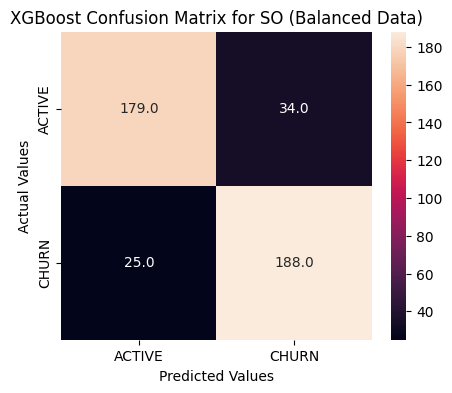

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb_df, annot=True, fmt='.1f')
plt.title('XGBoost Confusion Matrix for SO (Balanced Data)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Compute prediction probablitities
ups_xgb_prob = model_xgb_upsampled.predict_proba(xr_test)
ups_xgb_prob = ups_xgb_prob[:,1]

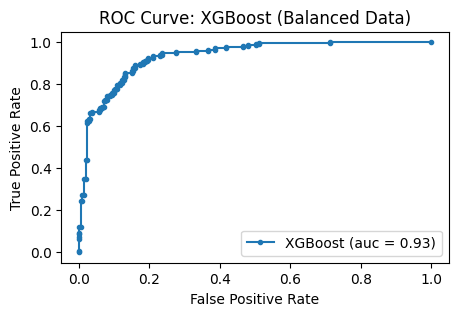

In [ ]:
# Calculate ROC curve and AUC using the binary labels
ups_xgb_fpr, ups_xgb_tpr, threshold = roc_curve(yr_test, ups_xgb_prob)
auc_ups_xgb = auc(ups_xgb_fpr, ups_xgb_tpr)

plt.figure(figsize=(5, 3), dpi=100)
plt.plot(ups_xgb_fpr, ups_xgb_tpr, marker='.',
         label='XGBoost (auc = %0.2f)' % auc_ups_xgb)

# Set the plot title
plt.title('ROC Curve: XGBoost (Balanced Data)')

# Set the axes labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

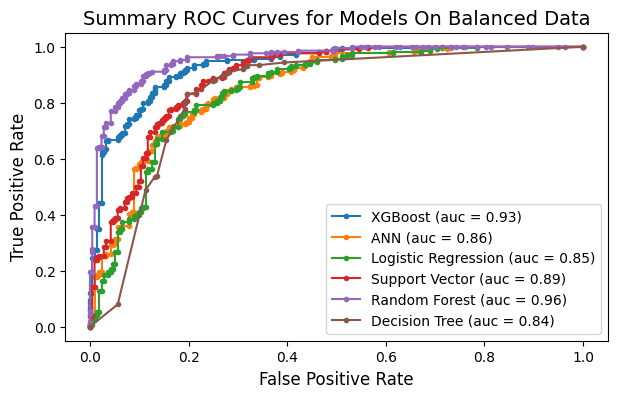

In [ ]:

plt.figure(figsize=(7, 4), dpi=100)

# Plotting ROC curves for different models
plt.plot(ups_xgb_fpr, ups_xgb_tpr, marker='.',
         label='XGBoost (auc = %0.2f)' % auc_ups_xgb)
plt.plot(ann_upsampled_fpr, ann_upsampled_tpr, marker='.',
         label='ANN (auc = %0.2f)' % auc_ann_upsampled)
plt.plot(ups_lrg_fpr, ups_lrg_tpr, marker='.',
         label='Logistic Regression (auc = %0.2f)' % auc_ups_lrg)
plt.plot(ups_svc_fpr, ups_svc_tpr, marker='.',
         label='Support Vector (auc = %0.2f)' % auc_ups_svc)
plt.plot(upsrf_fpr, upsrf_tpr, marker='.',
         label='Random Forest (auc = %0.2f)' % auc_upsrf)
plt.plot(upsdt_fpr, upsdt_tpr, marker='.',
         label='Decision Tree (auc = %0.2f)' % auc_upsdt)

plt.xlabel('False Positive Rate', size=12)
plt.ylabel('True Positive Rate', size=12)
plt.title('Summary ROC Curves for Models On Balanced Data', size=14)

plt.legend()

plt.show()